In [1]:
# skimroot='/run/media/ephelps/f8e8ff7e-2321-46f9-b5f5-203391519da8/jobs/skim.20140102'
skimroot = '/home/ephelps/dropbox/data/e16e1fjobssimtof/jobs/skim.20140102'
cfgs = {1:['%s/skim.e16.hists.root'%skimroot, 'echists_raw', 'e16.exp', 0.25, 0.7, 4],  # ['EC_Hists_e16.root', 'echists', 'e16.exp', 0.25, 0.7, 4.5],
        2:['%s/skim.e1f.hists.root'%skimroot, 'echists_raw', 'e1f.exp', 0.25, 0.7, 4],  # ['EC_Hists_e1f.root', 'echists_raw', 'e1f.exp', 0.25, 0.7, 4.5],
        3:['EC_Hists_e16.sim.root', 'echists_raw', 'e16.sim', 0.2, 0.9, 3.5],
        4:['EC_Hists_e1f.sim.root', 'echists_raw', 'e1f.sim', 0.2, 0.9, 3.5]}
    
finname, din, imgtmpl, losfapprox, fitxlo, fitxhi = _,_,_,_,_,_
def pick(pickme):
    global finname, din, imgtmpl, losfapprox, fitxlo, fitxhi
    finname, din, imgtmpl, losfapprox, fitxlo, fitxhi = cfgs[pickme]
    
pick(2)

In [2]:
import sys
write = sys.stdout.write

# import warnings
# warnings.filterwarnings('ignore')

from matplotlib import rc
rc('text', usetex=True)
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec

import ROOT as r

from rootpy.io import root_open
from rootpy.plotting import Hist, Hist2D, HistStack
from rootpy import asrootpy
import rootpy.plotting.root2matplotlib as rplt

goldenaspect=lambda x, rows=1, cols=1: (x,0.95*x/cols*rows/1.618)

def draw(hist, ncols=1, nrows=1, cell=1, fig=None,
         figsize=goldenaspect(3), **kwargs):
    if fig is None:
        fig = figure(figsize=figsize, dpi=1200, facecolor='white')
    else:
        figure(fig.number)
    subplot = fig.add_subplot(nrows, ncols, cell)
    #subplot.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    #subplot.ticklabel_format(scilimits=(0, 0))
    if isinstance(hist, r.TH2):
        rplt.hist2d(hist, axes=subplot, **kwargs)
    else:
        rplt.errorbar([hist], xerr=False, emptybins=False, **kwargs)
    # plt.show()
    return fig


In [3]:
fechists = root_open(finname)
for h in fechists[din]: print(h)
hs_ec_oVi = HistStack(hists=[asrootpy(fechists[din].Get('heo_V_ei_clean_anti_%d'%sector)) for sector in range(1,7)])
hs_ec_sfVp = HistStack(hists=[asrootpy(fechists[din].Get('hsf_V_p_clean_%d'%sector)) for sector in range(1,7)])

('echists_raw', [], ['heo_V_ei_clean_anti_1', 'heo_V_ei_clean_anti_3', 'heo_V_ei_clean_anti_2', 'heo_V_ei_clean_anti_5', 'heo_V_ei_clean_anti_4', 'heo_V_ei_clean_anti_6', 'hsf_V_p_clean_anti_6', 'hsf_V_p_clean_anti_5', 'hsf_V_p_clean_anti_4', 'hsf_V_p_clean_anti_3', 'hsf_V_p_clean_anti_2', 'hsf_V_p_clean_anti_1', 'heo_V_ei_clean_6', 'heo_V_ei_clean_5', 'heo_V_ei_clean_4', 'heo_V_ei_clean_3', 'heo_V_ei_clean_2', 'heo_V_ei_clean_1', 'hsf_V_p_clean_5', 'hsf_V_p_clean_4', 'hsf_V_p_clean_6', 'hsf_V_p_clean_1', 'hsf_V_p_clean_3', 'hsf_V_p_clean_2'])


In [4]:
for hs in [hs_ec_oVi, hs_ec_sfVp]:
    for h in hs:
        (imax, jmax) = shape(h)
        write('clearing %s ...' % h)
        for i in range(0, imax): h[i][0] = 0
        for j in range(0, jmax): h[0][j] = 0
        print('CLEARED!')
        #h.SetOption('col')
        #h.GetXaxis().SetRangeUser(0.02,0.1)
        #h.GetYaxis().SetRangeUser(0.02, 0.1)
        #h.SetMaximum(0.5*h.GetMaximum())

clearing Hist2D('heo_V_ei_clean_anti_1') ...CLEARED!
clearing Hist2D('heo_V_ei_clean_anti_2') ...CLEARED!
clearing Hist2D('heo_V_ei_clean_anti_3') ...CLEARED!
clearing Hist2D('heo_V_ei_clean_anti_4') ...CLEARED!
clearing Hist2D('heo_V_ei_clean_anti_5') ...CLEARED!
clearing Hist2D('heo_V_ei_clean_anti_6') ...CLEARED!
clearing Hist2D('hsf_V_p_clean_1') ...CLEARED!
clearing Hist2D('hsf_V_p_clean_2') ...CLEARED!
clearing Hist2D('hsf_V_p_clean_3') ...CLEARED!
clearing Hist2D('hsf_V_p_clean_4') ...CLEARED!
clearing Hist2D('hsf_V_p_clean_5') ...CLEARED!
clearing Hist2D('hsf_V_p_clean_6') ...CLEARED!


1,0.061
2,0.072
3,0.063
4,0.059
5,0.063
6,0.060


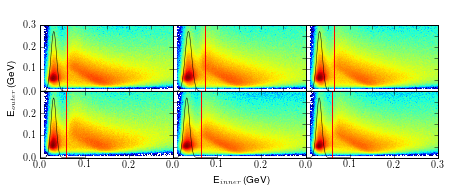

In [5]:
fgaus = r.TF1('fgaus', 'gaus', 0, 0.3)
nr, nc = 2, 3
fig = figure(figsize=goldenaspect(6.5,nr,nc))
gs = gridspec.GridSpec(nr, nc, wspace=0, hspace=0, left=0.1, right=0.95, bottom=0.175)
for irow in range(0,nr):
    for icol in range(0,nc):
        hnum = 3*irow+(icol+1)
        h2 = hs_ec_oVi[hnum-1]
        hx = h2.ProjectionX()
        hx.Fit(fgaus, 'N0', '', 0.01, 0.035)
        ax = subplot(gs[irow, icol])
        rplt.hist2d(h2, axes=ax, norm=LogNorm())
        X = linspace(0, 0.1, 100)
        fscale = fgaus.GetParameter(0)/(0.9*0.3)
        plot(X, [fgaus.Eval(x)/fscale for x in X],
             'k-', linewidth=0.5)
        cutoff = fgaus.GetParameter(1)+5*fgaus.GetParameter(2)
        #plot([0.13,cutoff], [0,cutoff], 'r-')
        #plot([cutoff,cutoff], [cutoff,0.3], 'r-')
        plot([cutoff,cutoff], [0,0.3], 'r-')
#         text(0.9, 0.85, 'sector %d'%hnum, fontsize=12, color='black', transform=ax.transAxes,
#              verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='gray', pad=5))
        print('%d,%.3f' % (hnum, cutoff))
#         annotate('(%.3f, %.3f) GeV'%(cutoff,cutoff), xy=(cutoff, cutoff),
#                  xytext=(+0.075, +0.2), fontsize=8,
#                  arrowprops=dict(arrowstyle="->",
#                                  connectionstyle="arc3,rad=.2"),
#                  bbox=dict(edgecolor='gray', facecolor='lightgray', alpha=0.85))
        if icol > 0:
            ax.set_yticklabels('')
        else:
            yticks(arange(0.0, 0.30, 0.1))
            if irow == 0:
                yticks(arange(0.0, 0.31, 0.1))
        if irow+1 < nr:
            ax.set_xticklabels('')
        else:
            xticks(arange(0.0, 0.30, 0.1))
            if icol+1 == nc:
                xticks(arange(0.0, 0.31, 0.10))
bigax = fig.add_axes([0.06, 0.105, 0.94, 0.895], frameon=False)
xticks([])
yticks([])
ylabel(r'E$_{outer}$ (GeV)')
xlabel(r'E$_{inner}$ (GeV)')
savefig('eid_ei_cut.%s.pdf'%imgtmpl)

In [6]:
def get_pointgen(gr, xlo, xhi):
    def genpoints():
        for x, y in zip(gr.x(), gsfmeans.y()):
            if x > xlo and x < xhi and y > 0:
                yield (x, y)
    return genpoints

def get_xslices(h2, window=1):
    hs = []
    for xbin in range(1, h2.GetNbinsX()+1):
        h = h2.ProjectionY('%s_%d'%(h2.GetName(),xbin), xbin, xbin+window-1)
        if h.Integral() < 10:
            h = None
        hs.append((h2.GetXaxis().GetBinCenter(xbin),h))
    return hs

def get_peak_points(h2, xlo, xhi, ylo=0):
    points = []
    hs = get_xslices(h2)
    pfinder = r.TSpectrum(1)
    for h in hs:
        if h[1] is not None and h[0]>xlo and h[0]<xhi:
            pfinder.Search(h[1], 2.5, 'goff')
            y = pfinder.GetPositionX()[0]
            if y > ylo:
                points.append((h[0],pfinder.GetPositionX()[0]))
    return points

fgaus = r.TF1('fgaus', 'gaus', 0.2, 0.4)
def get_peak_points_with_error(h2, xlo, xhi, ylo=0, window=1):
    xvals = []
    yvals = []
    yerrs = []
    chi2s = []
    sgmas = []
    serrs = []
    hs = get_xslices(h2, window)
    pfinder = r.TSpectrum(1)
    for h in hs:
        if h[1] is not None and h[0]>xlo and h[0]<xhi:
            pfinder.Search(h[1], 2.5, 'goff')
            y = pfinder.GetPositionX()[0]
            if y > ylo:
                fgaus.SetParameter(1, y)
                fgaus.SetParLimits(1, y-0.02, y+0.02)
                h[1].Fit(fgaus, 'QN0', 'goff', y-0.04, y+0.04)
                y = fgaus.GetParameter(1)
                yerr = fgaus.GetParError(1)
                chi2 = fgaus.GetChisquare()/fgaus.GetNDF()
                sgma = fgaus.GetParameter(2)
                serr = fgaus.GetParError(2)
                if chi2 < 10: #r.gMinuit.fCstatu.startswith('CONV') and chi2 < 4:
                    xvals.append(h[0])
                    yvals.append(y)
                    yerrs.append(yerr)
                    chi2s.append(chi2s)
                    sgmas.append(sgma)
                    serrs.append(serr)
    return xvals, yvals, yerrs, chi2s, sgmas, serrs

# fit electron peak
#     fsfgaus = r.TF1('fsfpeak', 'gaus', 0.26, 0.37)
#     parmobjarr = r.TObjArray()
#     h2.FitSlicesY(fsfgaus,  0, -1, 1, 'qnr', parmobjarr)
#     gsfmeans = asrootpy(parmobjarr[1])
#     genpoints = get_pointgen(gsfmeans, 1, 4)
#     xy = zip(*list(genpoints()))
#     pars = polyfit(xy[0], xy[1], 3)
    

In [12]:
def normXslices(h2):
    h2c = h2.Clone()
    nby = h2c.GetNbinsY()
    for xbin in range(1, h2c.GetNbinsX()+1):
        h1 = h2c.ProjectionY('%s_%d'%(h2c.GetName(),xbin), xbin, xbin)
        maxval = h1.GetMaximum()
        for ybin in range(1, nby+1):
            bc = h2c.GetBinContent(xbin,ybin)
            if bc > 0:
                h2c.SetBinContent(h2c.GetBin(xbin,ybin), bc/maxval)
    return h2c

ec_sf_hi_pol3	1,0.4,-0.039,0.02,-0.0025
ec_sf_lo_pol3	1,0.11,0.12,-0.037,0.0042
ec_sf_hi_pol3	2,0.43,0.023,-0.0091,0.0014
ec_sf_lo_pol3	2,0.12,0.1,-0.019,0.0008
ec_sf_hi_pol3	3,0.4,0.0044,0.0001,0.00048
ec_sf_lo_pol3	3,0.13,0.1,-0.022,0.0017
ec_sf_hi_pol3	4,0.4,0.0042,0.0056,-0.001
ec_sf_lo_pol3	4,0.13,0.073,-0.016,0.0014
ec_sf_hi_pol3	5,0.4,0.00065,-0.0019,0.00084
ec_sf_lo_pol3	5,0.075,0.12,-0.031,0.0023
ec_sf_hi_pol3	6,0.38,-0.003,0.0047,-0.00076
ec_sf_lo_pol3	6,0.11,0.099,-0.024,0.002


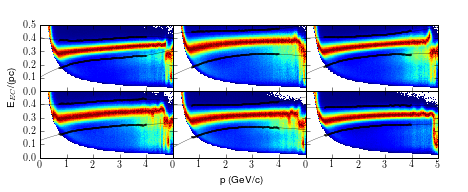

In [8]:
r.gErrorIgnoreLevel = r.kError
nr, nc = 2, 3
fig = figure(figsize=goldenaspect(6.5,nr,nc))
gs = gridspec.GridSpec(nr, nc, wspace=0, hspace=0, left=0.1, right=0.95, bottom=0.175) #, left=0.05, bottom=0.075)
for irow in range(0,nr):
    for icol in range(0,nc):
        hnum = 3*irow+(icol+1)
        h2 = hs_ec_sfVp[hnum-1]
        
        xvals, yvals, yerrs, chi2s, sgmas, serrs = get_peak_points_with_error(h2, fitxlo, fitxhi, losfapprox, 2)
        #pars = polyfit(xvals, yvals, 3, w=[1/yerr for yerr in yerrs if yerr>0])
        hicutvals = [y+3*s for y,s in zip(yvals,sgmas)]
        locutvals = [y-3*s for y,s in zip(yvals,sgmas)]
        cuterrs = [sqrt(yerr**2+(3*serr)**2) for yerr, serr in zip(yerrs, serrs)]
        #pars = polyfit(xvals, hicut, 3, w=[1/yerr for yerr in yerrs if yerr>0])
        #print('%d\t%.2g\t%.2g\t%.2g\t%.2g' % (hnum, pars[3], pars[2], pars[1], pars[0]))
        
        ax = subplot(gs[irow, icol])
        rplt.hist2d(normXslices(h2), axes=ax, cmin=0.0001) #, norm=LogNorm())
        (_,caps,_) = errorbar(xvals, hicutvals, cuterrs, fmt='k.', ms=0.75, lw=0.5, capsize=1)
        [cap.set_markeredgewidth(0.25) for cap in caps]
        (_,caps,_) = errorbar(xvals, locutvals, cuterrs, fmt='k.', ms=0.75, lw=0.5, capsize=1)
        [cap.set_markeredgewidth(0.25) for cap in caps]
        pars = polyfit(xvals, hicutvals, 3, w=[1/err**2 for err in cuterrs])
        plot(linspace(*xlim()), polyval(pars, linspace(*xlim())), '-', color='black', lw=0.3)
        print('%s\t%d,%.2g,%.2g,%.2g,%.2g' % ('ec_sf_hi_pol3', hnum, pars[3], pars[2], pars[1], pars[0]))
        #ax.fill_between(linspace(*xlim()), polyval(pars, linspace(*xlim())), 0.5, color='lightgray', alpha=0.75)
        pars = polyfit(xvals, locutvals, 3, w=[1/err**2 for err in cuterrs])
        plot(linspace(*xlim()), polyval(pars, linspace(*xlim())), '-', color='black', lw=0.3)
        print('%s\t%d,%.2g,%.2g,%.2g,%.2g' % ('ec_sf_lo_pol3', hnum, pars[3], pars[2], pars[1], pars[0]))
        #ax.fill_between(linspace(*xlim()), 0.0, polyval(pars, linspace(*xlim())), color='lightgray', alpha=0.75)
        #plot(linspace(*xlim()), polyval(pars, linspace(*xlim())), 'k-')
        #(_,caps,_) = errorbar(xvals, sgmas, serrs, fmt='k.', ms=0.5, capsize=1, lw=0.5)
        #(_,caps,_) = errorbar(xvals, yvals, yerrs, fmt='k.', ms=0.75, lw=0.5, capsize=1)
        #[cap.set_markeredgewidth(0.25) for cap in caps]
        #grid()
        
        if icol > 0:
            ax.set_yticklabels('')
        else:
            yticks(arange(0.0, 0.50, 0.1))
            if irow == 0:
                yticks(arange(0.0, 0.51, 0.1))
        if irow+1 < nr:
            ax.set_xticklabels('')
        else:
            xticks(arange(0.0, 5, 1))
            if icol+1 == nc:
                xticks(arange(0.0, 5.1, 1))

bigax = fig.add_axes([0.06, 0.105, 0.94, 0.895], frameon=False)
#bigax = axes(frameon=False)
xticks([])
yticks([])
ylabel(r'E$_{EC}$/(pc)')
xlabel('p (GeV/c)')
savefig('eid_sf.%s.pdf'%imgtmpl)

In [9]:
hicutvals = [y+3*s for y,s in zip(yvals,sgmas)]
locutvals = [y-3*s for y,s in zip(yvals,sgmas)]
cuterrs = [sqrt(yerr**2+(3*serr)**2) for yerr, serr in zip(yerrs, serrs)]

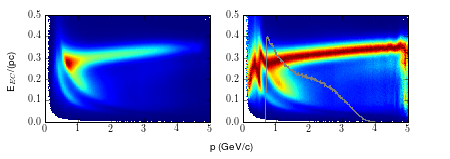

In [10]:
r.gErrorIgnoreLevel = r.kError
nr, nc = 1, 2
fig = figure(figsize=goldenaspect(6.5,nr,nc))
gs = gridspec.GridSpec(nr, nc, wspace=0, hspace=0, left=0.1, right=0.95, bottom=0.175) #, left=0.05, bottom=0.075)

fechists = root_open(finname)
din = 'echists_qskim_2'
sector = 1
h2 = asrootpy(fechists[din].Get('hsf_V_p_%d'%sector))

ax = subplot(1,2,1)
rplt.hist2d(h2, axes=ax, cmin=0.0001) #normXslices(h2), axes=ax, cmin=0.0001) #, norm=LogNorm())
ax = subplot(1,2,2)
rplt.hist2d(normXslices(h2), axes=ax, cmin=0.0001) #, norm=LogNorm())
hp = asrootpy(root_open('/home/ephelps/c1.root').hp)
hp.Scale(0.4/hp.GetMaximum())
hp.linecolor = 'gray'
rplt.hist(hp)
ylim(0,0.5)
# plot([0.139,0.139],[0.0,0.5], 'k-')
# plot([0.494,0.494],[0.0,0.5], 'k-')
    
bigax = fig.add_axes([0.075, 0.01, 0.9, 0.95], frameon=False)

#bigax = axes(frameon=False)
xticks([])
yticks([])
ylabel(r'E$_{EC}$/(pc)')
xlabel('p (GeV/c)')
savefig('eid_sf.cands.%s.pdf'%imgtmpl, bbox_inches='tight')

('echists_qskim_2', [], ['heo_V_ei_6', 'hsf_V_p_1', 'heo_V_ei_2', 'hsf_V_p_3', 'hsf_V_p_2', 'hsf_V_p_5', 'hsf_V_p_4', 'heo_V_ei_5', 'hsf_V_p_6', 'heo_V_ei_3', 'heo_V_ei_4', 'heo_V_ei_1'])


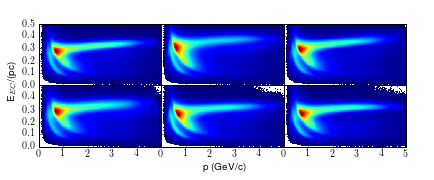

In [65]:
r.gErrorIgnoreLevel = r.kError
nr, nc = 2, 3
fig = figure(figsize=goldenaspect(6,nr,nc))
gs = gridspec.GridSpec(nr, nc, wspace=0, hspace=0, left=0.1, right=0.95, bottom=0.175) #, left=0.05, bottom=0.075)

fechists = root_open(finname)
din = 'echists_qskim_2'
for h in fechists[din]: print(h)
hs_ec_sfVp_cands = HistStack(hists=[asrootpy(fechists[din].Get('hsf_V_p_%d'%sector)) for sector in range(1,7)])

for irow in range(0,nr):
    for icol in range(0,nc):
        hnum = 3*irow+(icol+1)
        h2 = hs_ec_sfVp_cands[hnum-1]
        
        xvals, yvals, yerrs, chi2s, sgmas, serrs = get_peak_points_with_error(h2, fitxlo, fitxhi, losfapprox, 2)
        ax = subplot(gs[irow, icol])
        rplt.hist2d(h2, axes=ax, cmin=0.0001) #normXslices(h2), axes=ax, cmin=0.0001) #, norm=LogNorm())
        
        if icol > 0:
            ax.set_yticklabels('')
        else:
            yticks(arange(0.0, 0.50, 0.1))
            if irow == 0:
                yticks(arange(0.0, 0.51, 0.1))
        if irow+1 < nr:
            ax.set_xticklabels('')
        else:
            xticks(arange(0.0, 5, 1))
            if icol+1 == nc:
                xticks(arange(0.0, 5.1, 1))

bigax = fig.add_axes([0.06, 0.105, 0.94, 0.895], frameon=False)
#bigax = axes(frameon=False)
xticks([])
yticks([])
ylabel(r'E$_{EC}$/(pc)')
xlabel('p (GeV/c)')
savefig('eid_sf.cands.%s.pdf'%imgtmpl)

In [1]:
from rootpy.plotting import Hist2D
from rootpy.io import root_open
from rootpy import asrootpy
import rootpy.plotting.root2matplotlib as rplt

fin = root_open('/home/ephelps/documents/texws/thesis/figs/dtVp_candidates_100m.root')
h2 = asrootpy(fin.dtVp_cands)

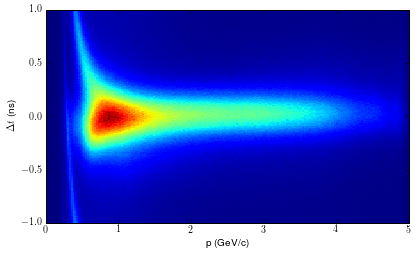

In [2]:
from matplotlib import rc
rc('text', usetex=True)
goldenaspect=lambda x, rows=1, cols=1: (x,0.95*x/cols*rows/1.618)
fig = figure(figsize=goldenaspect(6.5,1,1))
f = rplt.hist2d(h2, figure=fig) #normXslices(h2), figure=fig)
xlim(0,5)
xlabel('p (GeV/c)')
ylabel('$\Delta t$ (ns)')
fig.savefig('dtVp_candidates_100m.pdf')

# CC Cuts

In [1]:
%matplotlib inline
from rootpy.plotting import Hist, Hist2D, HistStack
from rootpy.io import root_open
from rootpy import asrootpy
import rootpy.plotting.root2matplotlib as rplt
import ROOT as r
import rootpy as rp
import numpy as np
from matplotlib import pyplot as plt

In [119]:
def gethists_nphe(ptype='p', sector=1):
    # ptype, sector = 'p', 1
    hnpheS = []
    ntmpl = 'hnphe_V_pmt_%s_s%d'
    with root_open('CC_Hists_all.root') as fin:
        h2n = ntmpl%(ptype,sector)
        h2 = asrootpy(fin.Get(h2n))
        for b in range(1,37):
            hn = h2n+'_pmt%d'%b
            h = asrootpy(h2.ProjectionY(hn,b,b))
            h.SetDirectory(0)
            h.SetBinContent(1,0)
            h.SetBinContent(2,0)
            hnpheS.append(h)
    return hnpheS

In [120]:
xmax = 300
xtmarks = np.arange(0,80,10)
xtlabls = ('',1,'','',4,'','',7,'')
hnphe_p_1 = gethists_nphe('p',1)
hnphe_pip_1 = gethists_nphe('pip',1)
hnphe_pim_1 = gethists_nphe('pim',1)
hnphe_e_1 = gethists_nphe('e',1)
hnphe_not_e_1 = [h1+h2+h3 for (h1, h2, h3) in zip(hnphe_p_1, hnphe_pip_1, hnphe_pim_1)]

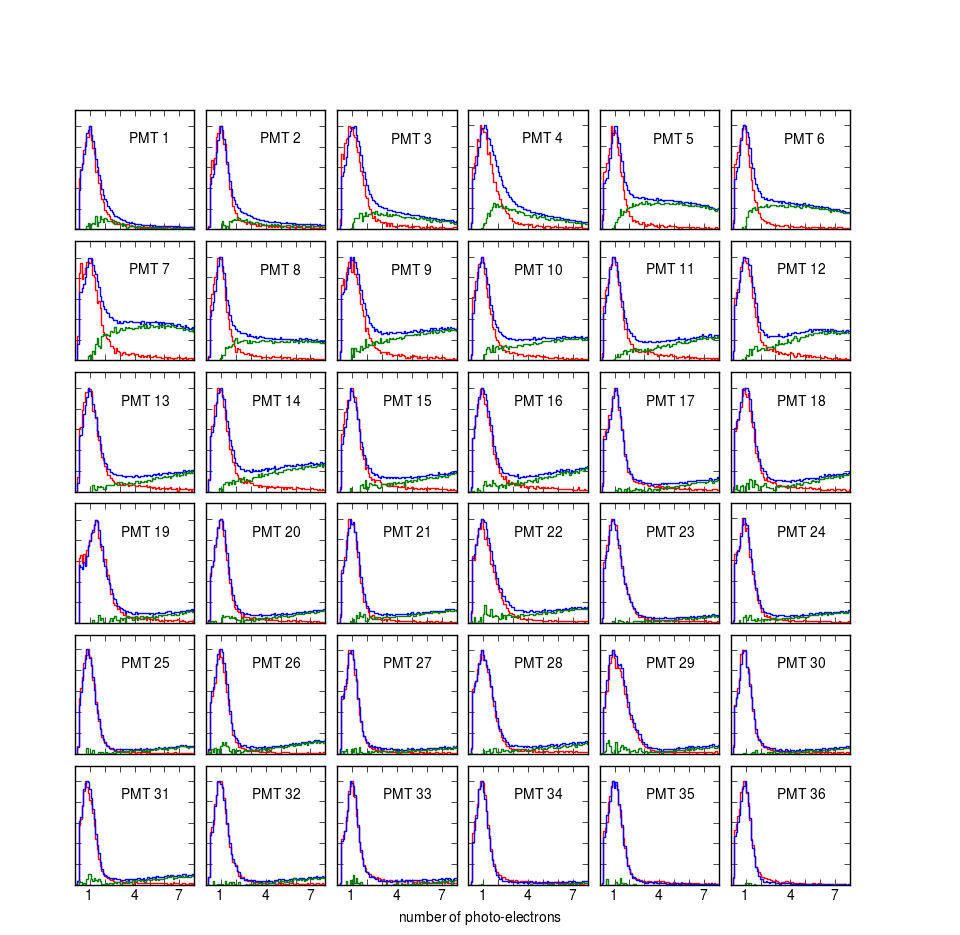

In [121]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i, (h,he) in enumerate(zip(hnphe_not_e_1,hnphe_e_1),1):
    ax = plt.subplot(6,6,i)
    if i > 30:
        plt.xticks(xtmarks, xtlabls)
    else:
        ax.set_xticklabels('')
    ax.set_yticklabels('')
    h.Scale(1/h.GetMaximum())
    he.Scale(1/he.GetMaximum())
    h.linecolor = 'red'
    he.linecolor = 'blue'
    rplt.hist(h)
    rplt.hist(he)
    he = he-h
    he.linecolor = 'green'
    rplt.hist(he)
    plt.text(0.8, 0.75, 'PMT %d'%i, transform=ax.transAxes, ha='right', va='center')
    plt.xlim(0,80)
    plt.ylim(0)

bigax = fig.add_axes([0.06, 0.105, 0.94, 0.895], frameon=False)
plt.xticks([])
plt.yticks([])
plt.xlabel('number of photo-electrons')

In [122]:
import ROOT as R
from math import exp

def d_gaus(x, par):
    return par[0]*R.TMath.Gaus(x[0], par[1], par[2])

def d_pois(x, par):
    return par[0]*R.TMath.Poisson(par[2]*x[0],par[1]*par[2])

def d_gausexp_p1(v, par):
    """Convolution of gauss and exponential using analytic expression.
    parameters:
        par[0] (mag):    magnitude
        par[1] (gmean):  gauss mean
        par[2] (gsigma): gauss sqrt(variance)
        par[3] (ehl):  exponential decay half-life.
        par[4] (p0)
        par[5] (p1)
    """
    x, mag, gmean, gsigma, ehl, p0, p1 = v[0], par[0], par[1], par[2], par[3], par[4], par[5]
    if mag <= 0 or gsigma <= 0 or ehl <= 0: return 0
    erate = R.TMath.Log(2)/ehl
    erfcarg = (gmean + erate*gsigma**2 - x)/(gsigma*R.TMath.Sqrt(2))
    factor = erate/2 * R.TMath.Exp(erate/2 * (2*gmean + erate*gsigma**2 - 2*x))
    val = mag * factor * R.TMath.Erfc(erfcarg) + p0*exp(-(x/p1)) # (p0/(x+p1))
    return val if val > 0 else 0

def d_gausexp_p1_pois(v, par):
    """Convolution of gauss and exponential using analytic expression.
    parameters:
        par[3] (mag):    magnitude
        par[4] (gmean):  gauss mean
        par[5] (gsigma): gauss sqrt(variance)
        par[6] (ehl):  exponential decay half-life.
        par[7] (p0)
        par[8] (p1)
        par[0] (pmag): magnitude of poisson
        par[1] (pmean): mean of poisson
        par[2] (pstretch): x-scaling
    """
    x, mag, gmean, gsigma, ehl, p0, p1 = v[0], par[3], par[4], par[5], par[6], par[7], par[8]
    if mag <= 0 or gsigma <= 0 or ehl <= 0: return 0
    erate = R.TMath.Log(2)/ehl
    erfcarg = (gmean + erate*gsigma**2 - x)/(gsigma*R.TMath.Sqrt(2))
    factor = erate/2 * R.TMath.Exp(erate/2 * (2*gmean + erate*gsigma**2 - 2*x))
    val = mag * factor * R.TMath.Erfc(erfcarg) + p0*exp(-(x/p1)) # (p0/(x+p1))
    val = val if val > 0 else 0
    val += par[0]*R.TMath.Poisson(par[2]*x,par[1]*par[2])
    return val 

def getFunNoise():
    ff = R.TF1('f2', d_gausexp_p1, 0, 300, 6)
    pars = [mag, gmean, gsigma, ehl, p0, p1] = [R.Double(14), R.Double(6), R.Double(2.5),
                                                R.Double(5), R.Double(0), R.Double(5)] #, R.Double(0.1), R.Double(-0.001)]
    ff.SetParNames('magnitude', 'mean', 'sigma', 'decay', 'a0', 'a1')
    #pars_f = [R.Double(1), R.Double(10), R.Double(3)]
    #f.SetParameters(pars_f[0], pars_f[1], pars_f[2])
    ff.SetParameters(pars[0], pars[1], pars[2], pars[3], pars[4], pars[5])
    ff.SetParLimits(0,R.Double(1.0),R.Double(30.0))
    ff.SetParLimits(2,R.Double(0.1),R.Double(10))
    ff.SetParLimits(3,R.Double(0.1),R.Double(10))
    ff.SetParLimits(4,R.Double(0),R.Double(0.2))
    ff.SetParLimits(5,R.Double(30),R.Double(200))
#     ff.SetParLimits(4,R.Double(0),R.Double(0.5))
#     ff.SetParLimits(5,R.Double(-0.01),R.Double(0))
    return ff

In [123]:
from matplotlib import rc
rc('text', usetex=True)
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec
goldenaspect=lambda x, rows=1, cols=1: (x,x/cols*rows/1.618)

def drawCCfits(pmtnums=[18], save=False, polbg=True, w=6.5):
    nrows = len(pmtnums)
    fig = plt.figure(figsize=goldenaspect(w,nrows,3))
    gs = gridspec.GridSpec(nrows, 3, wspace=0.1, hspace=0, left=0.1, right=0.95, bottom=0.175)
    
    for rownum, pmtnum in enumerate(pmtnums):
        h = hnphe_not_e_1[pmtnum-1]
        h.color='black'
        h.Scale(1/h.GetMaximum())
        ff = getFunNoise()
        
        if not polbg:
            ff.FixParameter(4,0)
            ff.FixParameter(5,1)
        
        h.Fit(ff, 'N0', '', 5, 350)
        ff.SetRange(0,350)
        pars = [ff.GetParameter(i) for i in range(0,ff.GetNpar())]
        X = np.linspace(0,350,200)
        Y = [d_gausexp_p1([R.Double(x)],pars) for x in X]
        Xc = pars[1]+3*(pars[2]+pars[3])
        
        ax1 = plt.subplot(gs[rownum,0])
        xtmarks = np.arange(0,80,10)
        xtlabls = ('',1,'',3,'',5,'',7,'')
        plt.xticks(xtmarks, xtlabls)
        plt.yticks([])
        rplt.hist(h)
        plt.plot(X,Y, 'r')
        plt.axvline(Xc, color='red', linestyle='dashed')
        plt.text(0.9, 0.85, r'$\tilde{\chi}^2 = %.2f$'%(ff.GetChisquare()/ff.GetNDF()), ha='right', va='top', transform=ax1.transAxes)
        if rownum==0:
            plt.text(0.5, 1.075, 'non-electron noise', transform=ax1.transAxes, va='bottom', ha='center')
        plt.xlim(0,80)
        
        ff2 = R.TF1('ff2', d_gausexp_p1_pois, 0, 350, 9)
        for i, p in enumerate(pars,3):
            if i == 8:
                ff2.FixParameter(i,p)
            elif i != 7:
                tol = 0.5 if i in [4,5,6] else 0.5
                (lf, rf) = (1-tol,1+tol) if p > 0 else (1+tol,1-tol)
                ff2.SetParameter(i,p)
                (lo,hi) = (lf*p,rf*p)
                ff2.SetParLimits(i,lo,hi)
        ff2.SetParameter(0, 1)
        ff2.SetParameter(1, 150)
        ff2.SetParameter(2, 0.04)
        ff2.SetParLimits(2, 0.001, 1)
        
        if not polbg:
            ff2.FixParameter(7,0)
            ff2.FixParameter(8,1)
        
        h = hnphe_e_1[pmtnum-1]
        h.color='black'
        h.Scale(1/h.GetMaximum())
        h.Fit(ff2, 'N0', '', 5, 350)
        
        pars = [ff2.GetParameter(i) for i in range(0,ff2.GetNpar())]
        X = np.linspace(0, 350, 350)
        Y = [d_gausexp_p1_pois([R.Double(x)],pars) for x in X]
        Y2 = [d_gausexp_p1([R.Double(x)],pars[3:]) for x in X]
        Y3 = [d_pois([R.Double(x)],pars[0:3]) for x in X]
        
        ax1 = plt.subplot(gs[rownum,1])
        ax1.set_yscale('log')
        xtmarks = (70, 140, 210, 280)
        xtlabls = (7, 14, 21, 28)
        plt.xticks(xtmarks, xtlabls)
        plt.yticks([])
        plt.axvline(Xc, color='red', linestyle='dashed')
        plt.plot(X,Y,'gray', linewidth=2)
        rplt.hist(h)
        plt.plot(X,Y2,'r')
        plt.plot(X,Y3,'g')
        plt.text(0.9, 0.85, r'$\tilde{\chi}^2 = %.2f$'%(ff2.GetChisquare()/ff2.GetNDF()), ha='right', va='top', transform=ax1.transAxes)
        if rownum==0:
            plt.text(0.5, 1.075, 'electrons with noise', transform=ax1.transAxes, va='bottom', ha='center')
        plt.text(0.97, 0.3, 'LOG', transform=ax1.transAxes, rotation=90, va='bottom', ha='right')
        plt.xlim(0,350)
        plt.ylim(0.001,1.1)
        
        h2 = h.Clone()
        ff.SetRange(0,350)
        [ff.SetParameter(i,ff2.GetParameter(i+3)) for i in range(0,ff.GetNpar())]
        h2.Add(ff,-1)
        fpois = R.TF1('fpois',d_pois,0,350,3)
        fpois.SetParameters(pars[0],pars[1],pars[2])
        h2.Fit(fpois,'N0','',30,300)
        Y = [d_pois([R.Double(x)],[fpois.GetParameter(i) for i in range(0,3)]) for x in X] # pars[0:3]) for x in X]
        h2.GetXaxis().SetRangeUser(30,350)
        ymax = 1.2*h2.GetMaximum()
        h2.GetXaxis().SetRangeUser(0,-1)
        
        ax2 = plt.subplot(gs[rownum,2])
        plt.xticks(xtmarks, xtlabls)
        plt.yticks([])
        h.color='black'
        h.color='red'
        rplt.hist(h)
        rplt.hist(h2)
        plt.axvline(Xc, color='red', linestyle='dashed')
        plt.plot(X,Y, 'g')
        #plot(X,Y2,'r')
        plt.text(0.9, 0.85, r'$\tilde{\chi}^2 = %.2f$'%(fpois.GetChisquare()/fpois.GetNDF()), ha='right', va='top', transform=ax2.transAxes)
        if rownum==0:
            plt.text(0.5, 1.075, 'electrons', transform=ax2.transAxes, va='bottom', ha='center')
        plt.xlim(0,350)
        plt.ylim(0,ymax)
        plt.text(1.05, 0.5, 'PMT %d'%pmtnum, fontsize=12, color='0.25',
             transform=ax2.transAxes, rotation=-90, va='center', ha='left')
        
        fpois = R.TF1('fpois', d_pois, 0, 350, 3)
        fpois.SetParameters(pars[0],pars[1],pars[2])
        print('Efficiency = %.3f'%(fpois.Integral(30,350)/fpois.Integral(0,350)))
    bigax = fig.add_axes([0.085, 0.12, 0.875, 0.85], frameon=False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('number of photo-electrons')
    plt.ylabel('relative photo-electron count frequency')
    
    if save: plt.savefig('eid_cc_fit_sample_%s_e16.pdf'%str(pmtnums), bbox_inches='tight')

Efficiency = 0.981
Efficiency = 0.996
Efficiency = 0.751


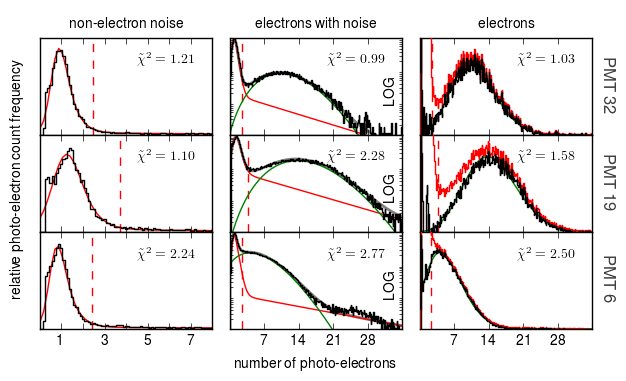

In [124]:
drawCCfits([32, 19, 6], True) #, False, 18)

# All CC PMTs

In [109]:
def getNpheHists(sect):
    hnphe_p_1 = gethists_nphe('p',sect)
    hnphe_pip_1 = gethists_nphe('pip',sect)
    hnphe_pim_1 = gethists_nphe('pim',sect)
    hnphe_e_1 = gethists_nphe('e',sect)
    hnphe_not_e_1 = [h1+h2+h3 for (h1, h2, h3) in zip(hnphe_p_1, hnphe_pip_1, hnphe_pim_1)]
    return (hnphe_e_1, hnphe_not_e_1)

In [110]:
def fitCCpmts(sect=1):
    (hchi2, hmean, hsig, hNint, heff) = [Hist(36,0.5,36.5) for i in range(0,5)] #, Hist(36,0.5,36.5), Hist(36,0.5,36.5), Hist(36,0.5,36.5)
    hnphe_e, hnphe_not_e = getNpheHists(sect)
    xtmarks = (60, 170, 280)
    xtlabls = (6, 17, 28)
    
    fig = plt.figure(figsize=(6.5,8.5))
    fig.subplots_adjust(hspace=0.1, wspace=0.1)
    for pnum, (h,he) in enumerate(zip(hnphe_not_e,hnphe_e),1):
        h.Scale(1/h.GetMaximum())
        he.Scale(1/he.GetMaximum())
        fbg = getFunNoise()
        ff2 = R.TF1('ff2', d_gausexp_p1_pois, 0, 350, 9)
        
        h.Fit(fbg,'N0','',5,350)
        pars = [fbg.GetParameter(i) for i in range(0,fbg.GetNpar())]
        Xc = pars[1]+3*(pars[2]+pars[3])
        
        for i, p in enumerate(pars,3):
            if i == 8:
                ff2.FixParameter(i,p)
            elif i != 7:
                tol = 0.5 if i in [4,5,6] else 0.5
                (lf, rf) = (1-tol,1+tol) if p > 0 else (1+tol,1-tol)
                ff2.SetParameter(i,p)
                (lo,hi) = (lf*p,rf*p)
                ff2.SetParLimits(i,lo,hi)
        ff2.SetParameter(0, 1)
        ff2.SetParameter(1, 150)
        ff2.SetParameter(2, 0.04)
        ff2.SetParLimits(2, 0.005, 1)
        
        he.Fit(ff2,'N0','',5,350)
        
        pars = [ff2.GetParameter(i) for i in range(0,ff2.GetNpar())]
        fpois = R.TF1('fpois', d_pois, 0, 350, 3)
        fpois.SetParameters(pars[0],pars[1],pars[2])
        
        he2 = he.Clone()
        fbg.SetRange(0,350)
        [fbg.SetParameter(i,ff2.GetParameter(i+3)) for i in range(0,fbg.GetNpar())]
        he2.Add(fbg,-1)
        ax = plt.subplot(6,6,pnum)
        if pnum > 30:
            plt.xticks(xtmarks, xtlabls)
        else:
            ax.set_xticklabels('')
        ax.set_yticklabels('')
        X = np.linspace(0, 350, 350)
        Y = [d_pois([R.Double(x)],pars[0:3]) for x in X]
        he2.color='black'
        rplt.hist(he2)
        he.color='gray'
        rplt.hist(he)
        plt.plot(X,Y,'b')
        plt.axvline(Xc, color='red')
        he2.GetXaxis().SetRangeUser(30,300)
        ymax = 1.4*he2.GetMaximum()
        he2.GetXaxis().SetRangeUser(0,-1)
        plt.xlim(0,350)
        plt.ylim(0,ymax)
        
        Nint = fpois.Integral(0,300)
        pmean = fpois.GetParameter(1)
        psig = fpois.GetParameter(2)
        eff = fpois.Integral(30,300)/Nint
        ch2 = ff2.GetChisquare()/ff2.GetNDF()
        
        hchi2.Fill(pnum,ch2)
        hmean.Fill(pnum,pmean)
        hsig.Fill(pnum,psig)
        hNint.Fill(pnum,Nint)
        heff.Fill(pnum,eff)
        
        print('%d,%d,%.1f,%.3f'%(sect,pnum,Xc,eff))
        
        plt.text(0.9, 0.2, r'%d'%(36*(sect-1)+pnum), fontsize=10,
             transform=ax.transAxes, ha='right', va='bottom')
        plt.text(0.9, 0.9, r'$\tilde{\chi}^{2} = %.2f$'%ch2, fontsize=8,
             transform=ax.transAxes, ha='right', va='top')
        plt.text(0.9, 0.75, r'$%.1f\%%$'%(100*eff), fontsize=10,
             transform=ax.transAxes, ha='right', va='top')
        
    bigax = fig.add_axes([0.1, 0.1, 0.88, 0.895], frameon=False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('number of photo-electrons')
    plt.ylabel('relative photo-electron count frequency')
    plt.savefig('eid_cc_fits_%d_e16.pdf'%sect, bbox_inches='tight')
    return hchi2, hmean, hsig, hNint, heff

1,1,27.4,0.717
1,2,25.2,0.623
1,3,30.6,0.546
1,4,31.6,0.612
1,5,25.2,0.741
1,6,24.0,0.751
1,7,29.9,0.804
1,8,23.5,0.834
1,9,30.3,0.912
1,10,25.3,0.895
1,11,25.0,0.963
1,12,27.6,0.907
1,13,27.4,0.988
1,14,25.9,0.913
1,15,26.5,0.985
1,16,27.3,0.977
1,17,25.8,0.983
1,18,27.5,0.987
1,19,37.2,0.996
1,20,24.6,0.959
1,21,24.7,0.976
1,22,33.0,0.961
1,23,27.8,0.986
1,24,25.4,0.951
1,25,24.1,0.985
1,26,24.7,0.970
1,27,23.2,0.995
1,28,29.4,0.976
1,29,34.8,0.975
1,30,23.3,0.990
1,31,23.3,0.982
1,32,24.7,0.981
1,33,23.1,0.971
1,34,22.1,0.975
1,35,25.1,0.983
1,36,22.2,0.995
2,1,26.6,0.438
2,2,34.0,0.830
2,3,27.5,0.748
2,4,27.3,0.662
2,5,28.8,0.700
2,6,33.9,0.825
2,7,19.2,0.832
2,8,26.1,0.728
2,9,25.5,0.871
2,10,25.4,0.864
2,11,18.0,0.882
2,12,29.3,0.976
2,13,25.5,0.811
2,14,27.4,0.950
2,15,19.4,0.928
2,16,24.4,0.949
2,17,22.5,0.952
2,18,31.8,0.990
2,19,25.8,0.940
2,20,32.6,0.962
2,21,24.1,0.909
2,22,20.3,0.948
2,23,21.9,0.949
2,24,19.8,0.992
2,25,25.6,0.965
2,26,24.1,0.960
2,27,24.8,0.977
2,28,36.6,

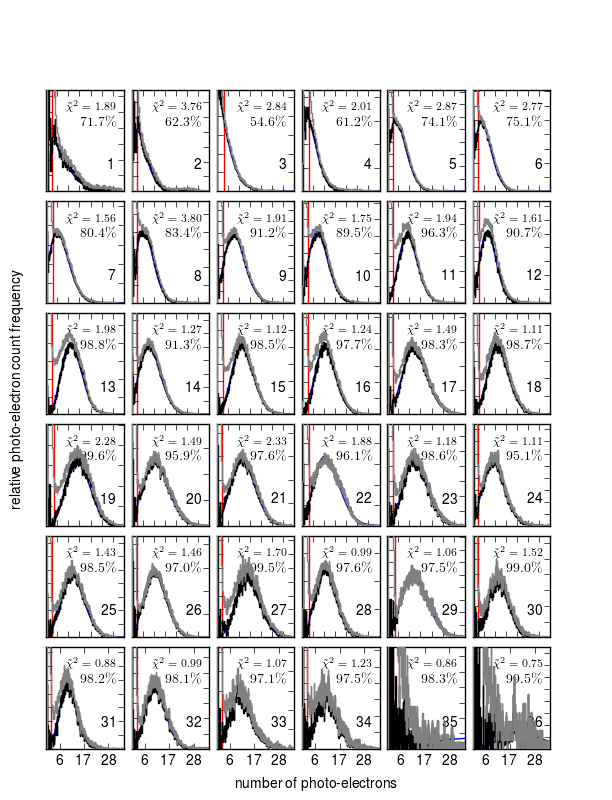

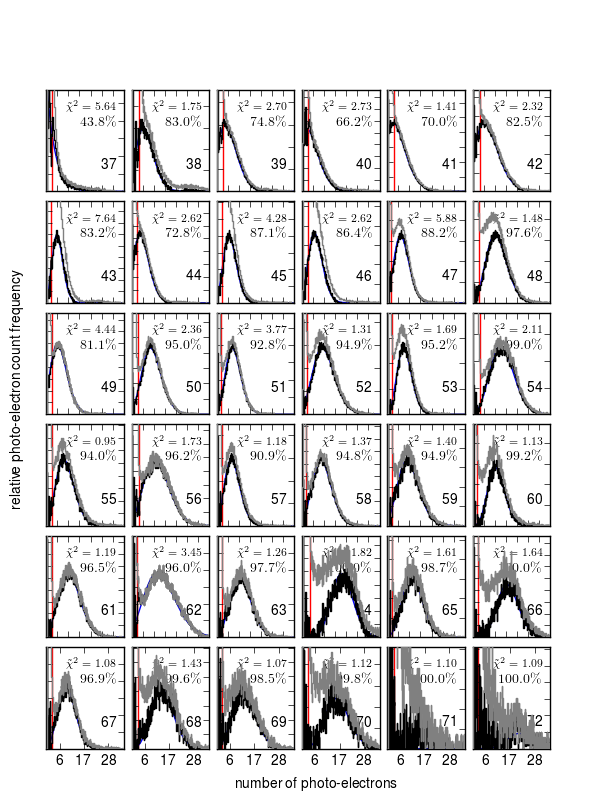

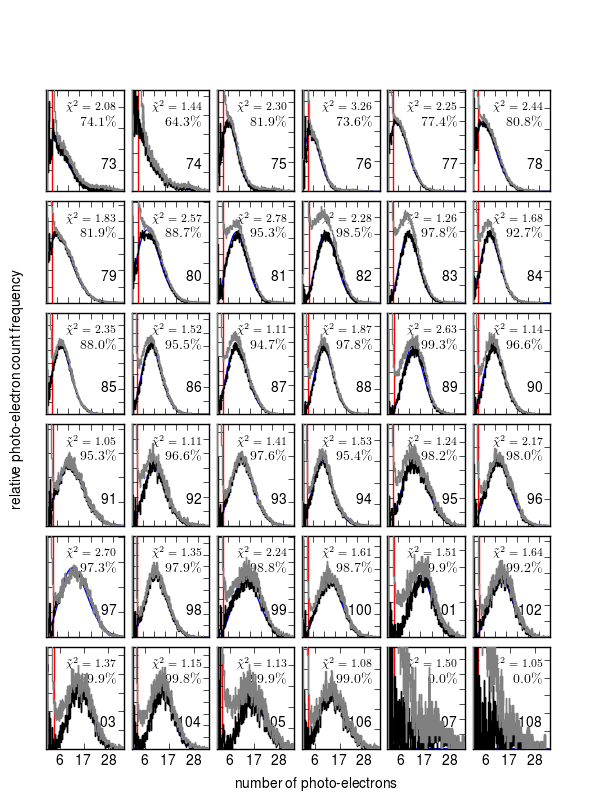

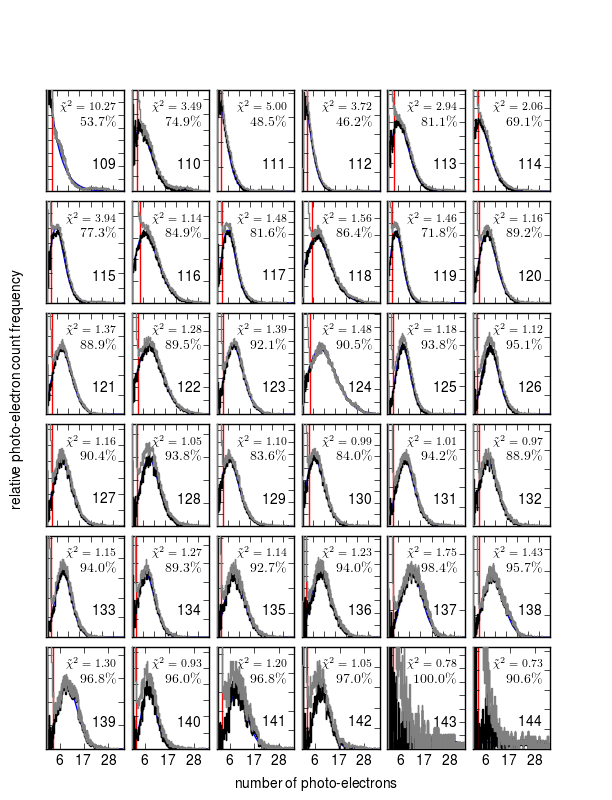

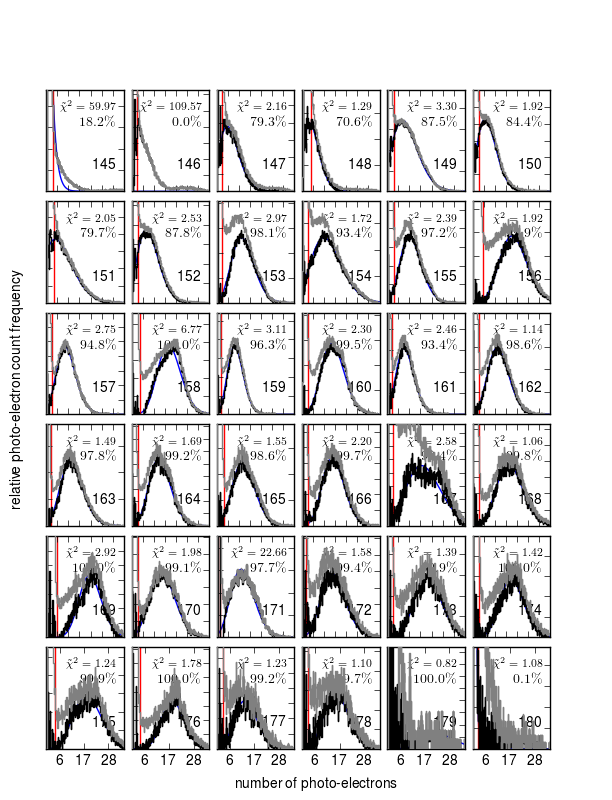

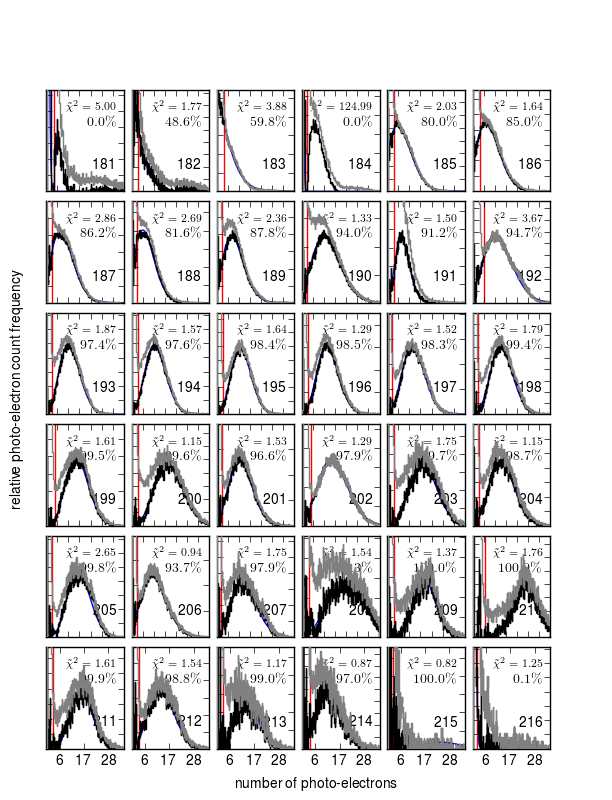

In [125]:
# hpars = fitCCpmts(1)
hpars = [[],[],[],[],[],[]]
for sect in range(1,7):
    hpars[sect-1] = fitCCpmts(sect)

(0, 40)

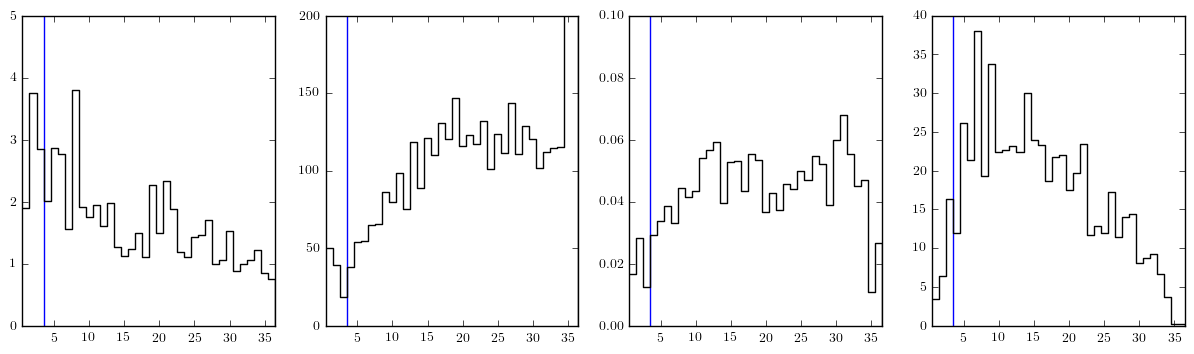

In [126]:
plt.figure(figsize=(15,4))
plt.subplot(141)
rplt.hist(hpars[0][0])
plt.axvline(3.5)
plt.ylim(0,5)
plt.subplot(142)
rplt.hist(hpars[0][1])
plt.axvline(3.5)
plt.ylim(0,200)
plt.subplot(143)
rplt.hist(hpars[0][2])
plt.axvline(3.5)
plt.ylim(0,0.1)
plt.subplot(144)
rplt.hist(hpars[0][3])
plt.axvline(3.5)
plt.ylim(0,40)

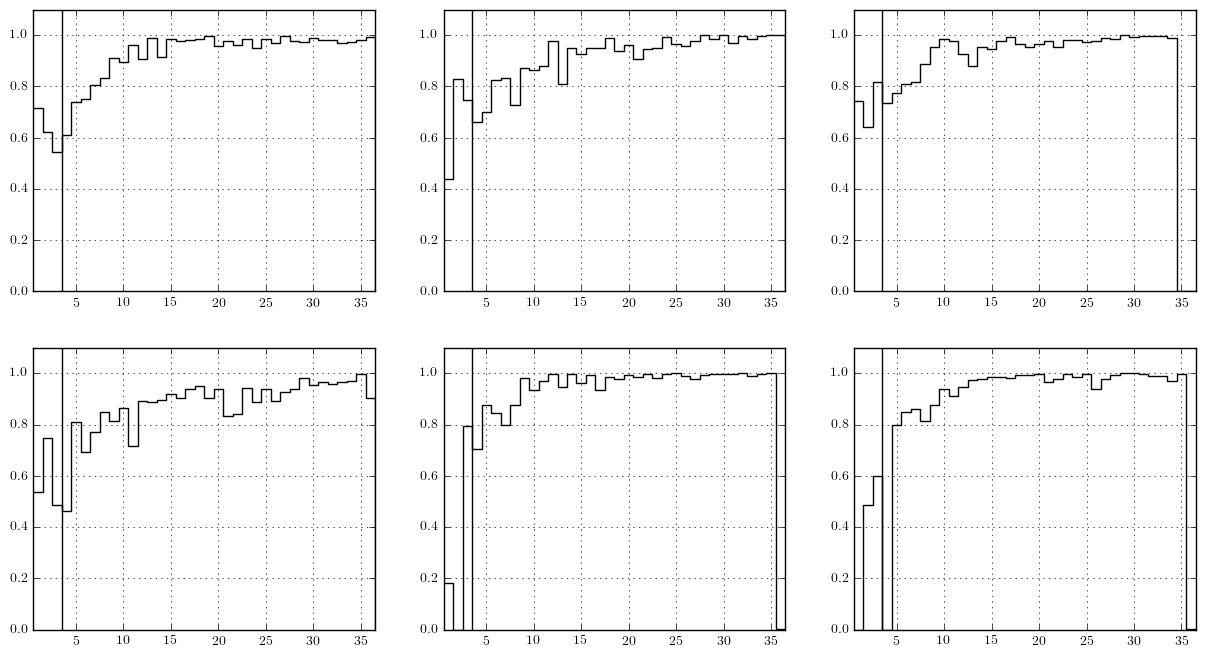

In [127]:
plt.figure(figsize=(15,8))
for i in range(0,6):
    plt.subplot(2,3,i+1)
    rplt.hist(hpars[i][4])
    #rplt.hist(hpars[1][4])
    plt.vlines(3.5,0,1.1)
    plt.ylim(0,1.1)
    plt.grid()

In [77]:
def mdraw(hs, xlbl, ylbl, ylims=None, nr=2, nc=3):
    r.gErrorIgnoreLevel = r.kError
    fig = plt.figure(figsize=goldenaspect(6,nr,nc))
    gs = gridspec.GridSpec(nr, nc, wspace=0.075, hspace=0.15, left=0.1, right=0.95, bottom=0.175) #, left=0.05, bottom=0.075)

    for irow in range(0,nr):
        for icol in range(0,nc):
            hnum = 3*irow+(icol+1)
            h = hs[hnum-1]

            ax = plt.subplot(gs[irow, icol])
            rplt.hist(h, axes=ax, cmin=0.0001) #normXslices(h2), axes=ax, cmin=0.0001) #, norm=LogNorm())

            if ylims is not None:
                plt.ylim(*ylims)
            if icol > 0:
                ax.set_yticklabels('')
            if irow+1 < nr:
                ax.set_xticklabels('')
            plt.grid()

    bigax = fig.add_axes([0.06, 0.105, 0.94, 0.895], frameon=False)
    #bigax = axes(frameon=False)
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(ylbl)
    plt.xlabel(xlbl)

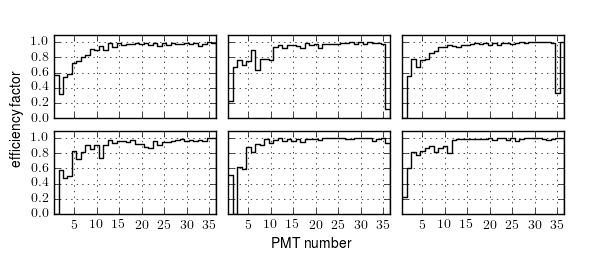

In [78]:
mdraw([hpars[i][4] for i in range(0,6)],'PMT number', 'efficiency factor', [0,1.1])
plt.savefig('eid_cc_eff_e16.pdf', bbox_inches='tight')

In [48]:
y = lambda x:20.28+6.74*x
y(3)

40.5

# Scratch

In [117]:
from matplotlib import rc
rc('text', usetex=True)
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec
goldenaspect=lambda x, rows=1, cols=1: (x,x/cols*rows/1.618)

def drawCCfits2(pmtnums=[18], polbg=True, save=False):
    nrows = len(pmtnums)
    fig = figure(figsize=goldenaspect(6.5,nrows,3))
    gs = gridspec.GridSpec(nrows, 3, wspace=0.1, hspace=0, left=0.1, right=0.95, bottom=0.175)
    
    for rownum, pmtnum in enumerate(pmtnums):
        h = hnphe_not_e_1[pmtnum-1]
        h.color='black'
        h.Scale(1/h.GetMaximum())
        ff = getFunNoise2()
        
        ff.FixParameter(5,0)
        #ff.FixParameter(4,0.1)
        
        h.Fit(ff, 'N0', '', 5, 90)
        ff.SetRange(0,350)
        pars = [ff.GetParameter(i) for i in range(0,ff.GetNpar())]
        X = linspace(0,100,200)
        Y = [d_gausexp_2([R.Double(x)],pars) for x in X]
        Xc = pars[1]+3*(pars[2]+pars[3])
        
        ax1 = subplot(gs[rownum,0])
        xtmarks = arange(0,80,10)
        xtlabls = ('',1,'',3,'',5,'',7,'')
        xticks(xtmarks, xtlabls)
        yticks([])
        rplt.hist(h)
        plot(X,Y, 'r')
        axvline(Xc, color='red', linestyle='dashed')
        # text(0.95, 0.9, 'non-electrons,\nshape of noise peak', transform=ax1.transAxes, va='top', ha='right')
        if rownum==0:
            text(0.5, 1.075, 'non-electron noise', transform=ax1.transAxes, va='bottom', ha='center')
        xlim(0,80)
        
        ff2 = R.TF1('ff2', d_gausexp_2_pois, 0, 350, 9)
        for i, p in enumerate(pars,3):
#             print('%s = %.3e'%(ff.GetParName(i-3),p))
            if i != 3:
                ff2.FixParameter(i,p)
            else:
                tol = 0.5 if i in [4,5,6] else 0.5
                (lf, rf) = (1-tol,1+tol) if p > 0 else (1+tol,1-tol)
                ff2.SetParameter(i,p)
                (lo,hi) = (lf*p,rf*p)
                ff2.SetParLimits(i,lo,hi)
        ff2.SetParameter(0, 1)
        ff2.SetParameter(1, 150)
        ff2.SetParameter(2, 0.04)
        ff2.SetParLimits(2, 0.001, 1)
        
        ff2.FixParameter(8,0)
        #ff.FixParameter(4,0.1)
        
        h = hnphe_e_1[pmtnum-1]
        h.color='black'
        h.Scale(1/h.GetMaximum())
        h.Fit(ff2, 'N0', '', 5, 350)
        
        pars = [ff2.GetParameter(i) for i in range(0,ff2.GetNpar())]
        X = linspace(0, 350, 350)
        Y = [d_gausexp_2_pois([R.Double(x)],pars) for x in X]
        Y2 = [d_gausexp_2([R.Double(x)],pars[3:]) for x in X]
        Y3 = [d_pois([R.Double(x)],pars[0:3]) for x in X]
        
        ax1 = subplot(gs[rownum,1])
        ax1.set_yscale('log')
        xtmarks = (70, 140, 210, 280)
        xtlabls = (7, 14, 21, 28)
        xticks(xtmarks, xtlabls)
        yticks([])
        axvline(Xc, color='red', linestyle='dashed')
        plot(X,Y,'gray', linewidth=2)
        rplt.hist(h)
        plot(X,Y2,'r')
        plot(X,Y3,'g')
        #text(0.95, 0.9, 'contaminated\nelectrons', transform=ax1.transAxes, va='top', ha='right')
        if rownum==0:
            text(0.5, 1.075, 'electrons with noise', transform=ax1.transAxes, va='bottom', ha='center')
        text(0.98, 0.2, 'LOG', transform=ax1.transAxes, rotation=90, va='bottom', ha='right')
        xlim(0,350)
        ylim(0.001,1.1)
        
        h2 = h.Clone()
        ff.SetRange(0,350)
        [ff.SetParameter(i,ff2.GetParameter(i+3)) for i in range(0,ff.GetNpar())]
        h2.Add(ff,-1)
        Y = [d_pois([R.Double(x)],pars[0:3]) for x in X]
        h2.GetXaxis().SetRangeUser(30,350)
        ymax = 1.2*h2.GetMaximum()
        h2.GetXaxis().SetRangeUser(0,-1)
        
        ax2 = subplot(gs[rownum,2])
        xticks(xtmarks, xtlabls)
        yticks([])
        h.color='black'
        h.color='red'
        rplt.hist([h,h2], stacked=False)
        axvline(Xc, color='red', linestyle='dashed')
        plot(X,Y, 'g')
        #plot(X,Y2,'r')
        #text(0.95, 0.9, 'noise\nsubtracted', transform=ax2.transAxes, va='top', ha='right')
        if rownum==0:
            text(0.5, 1.075, 'electrons', transform=ax2.transAxes, va='bottom', ha='center')
        xlim(0,350)
        ylim(0,ymax)
        text(1.05, 0.5, 'PMT %d'%pmtnum, fontsize=12, color='0.25',
             transform=ax2.transAxes, rotation=-90, va='center', ha='left')
        
#         print('-----------------')
#         for i, (pname, pval) in enumerate(zip(['pois_amp','pois_mean','pois_stretch'],pars[0:3])):
#             print('%s = %.3e'%(pname,pval))
#         print('-----------------')
        fpois = R.TF1('fpois', d_pois, 0, 350, 3)
        fpois.SetParameters(pars[0],pars[1],pars[2])
#         print('Total = %.3f'%fpois.Integral(0,350))
#         print('Cut = %.3f'%fpois.Integral(0,30))
#         print('Kept = %.3f'%fpois.Integral(30,350))
        print('Efficiency = %.3f'%(fpois.Integral(30,350)/fpois.Integral(0,350)))
#         print('-----------------')
    bigax = fig.add_axes([0.085, 0.12, 0.875, 0.85], frameon=False)
    xticks([])
    yticks([])
    xlabel('number of photo-electrons')
    ylabel('relative photo-electron count frequency')
    
    if save: savefig('eid_cc_fit_sample_%s.pdf'%str(pmtnums), bbox_inches='tight')

In [118]:
drawCCfits2([32, 19, 6], False)

NameError: name 'figure' is not defined

(0, 80)

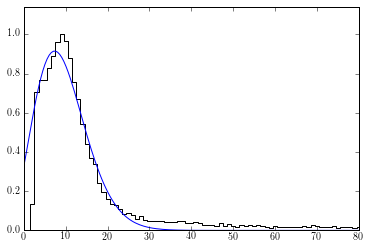

In [72]:
def d_pois(x, par):
    return par[0]*R.TMath.Poisson(par[2]*x[0],par[1])

h = hnphe_not_e_1[5]
h.Scale(1/h.GetMaximum())
ff = R.TF1('ff', d_pois, 0, 100, 3)
ff.SetParameters(1, 10, 3)
h.Fit(ff, 'N0', '', 5, 30)
pars = [ff.GetParameter(i) for i in range(0,ff.GetNpar())]
X = linspace(0,100,200)
Y = [d_pois([R.Double(x)],pars) for x in X]

rplt.hist(h)
plot(X,Y)
xlim(0,80)

In [3]:
%run ../python/oana_setup.py

/data/e1f/skim/3????.root
/data/e1f/skim/3xxxx_run.root
run.lum(=l)
runb.lb(=l)
tpipf.tpilf(=lf)
h10.tpipf(=pf)
h10.run(=r)
h10.tkin(=k)
elist_fid_mm_[123]=el[123]
loaded acc.cpp
loaded fid.cpp
loaded particle-constants.h
loaded Fid instance
loaded infid.C
loaded eff.cpp
recompiling h10t3pi_sel.C...
... done.
Fid::Instance() loaded	 from /home/ephelps/projects/phys-ana-omega/fid.cpp	 with parameters from /home/ephelps/analysis/omega/input/fid.parms
infid() loaded	 from /home/ephelps/projects/phys-ana-sandbox/sim/infid.C
h10 aliases: c, mpip, bifpip, dtifpip, sf	fidpass, fidpass[e,p,pip,pim]	top[1,2,3]pass, mmthreshpass, mmpi0pass	ccpass


In [24]:
import ROOT as R
h10.SetEntryList(0)
h10.Draw('>>elist', 'top3pass && mmthreshpass && mmpi0pass && fidpass', 'entrylist')
elist = R.gDirectory().Get('elist')
h10.SetEntryList(elist)

TypeError: '_ExpandMacroFunction' object is not callable

In [22]:
h = rh1('nphe[cc[0]-1]', 'ccseg==5 && ccsect==1', binning=(300,0,300))

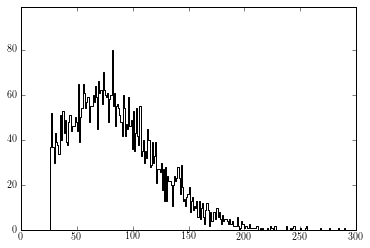

In [23]:
rplt.hist(h)

In [9]:
h10.Draw('ccseg>>hseg(19,-0.5,18.5)', '','',1000)

1000L

In [15]:
print(h2.GetTitle())

sc_t[sc[0]-1]-tr_time-sc_r[sc[0]-1]/29.9792458:p[0] {stat[0]>0 && id[0]==11 && sc[0]>0}


(-2, 2)

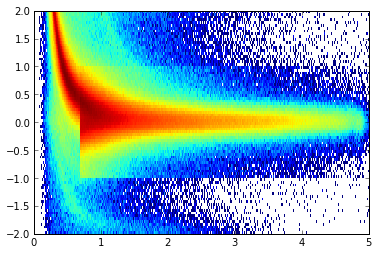

In [30]:
from rootpy.plotting import Hist2D
from rootpy.io import root_open
from rootpy import asrootpy
import rootpy.plotting.root2matplotlib as rplt
from matplotlib.colors import LogNorm

fin = root_open('/data/jobs/skim.20140102/skim.e1f.hists.root')
h = fin.scpid.hdt_V_p_neg_e_s1_p1.clone()
for i in range(2,30):
    h = h + asrootpy(fin.scpid.Get('hdt_V_p_neg_e_s1_p%d'%i))

tmph2 = rplt.hist2d(asrootpy(h), norm=LogNorm())
ylim(-2,2)

In [31]:
%run /home/ephelps/projects/phys-ana-omega/python/oana_setup.py

/data/e1f/skim/3????.root
/data/e1f/skim/3xxxx_run.root
run.lum(=l)
runb.lb(=l)
tpipf.tpilf(=lf)
h10.tpipf(=pf)
h10.run(=r)
h10.tkin(=k)
elist_fid_mm_[123]=el[123]
loaded acc.cpp
loaded fid.cpp
loaded particle-constants.h
loaded Fid instance
loaded infid.C
loaded eff.cpp
recompiling h10t3pi_sel.C...
... done.
Fid::Instance() loaded	 from /home/ephelps/projects/phys-ana-omega/fid.cpp	 with parameters from /home/ephelps/analysis/omega/input/fid.parms
infid() loaded	 from /home/ephelps/projects/phys-ana-sandbox/sim/infid.C
h10 aliases: c, mpip, bifpip, dtifpip, sf	fidpass, fidpass[e,p,pip,pim]	top[1,2,3]pass, mmthreshpass, mmpi0pass	ccpass


In [36]:
h10.SetAlias("c",'29.97925')
h10.SetAlias("mp",'0.9382721')
h10.SetAlias("mpip",'0.1395702')
h10.SetAlias("bifpip","sqrt(p*p/(p*p+mpip*mpip))")
h10.SetAlias("dtifpip","sc_t[sc-1]-sc_r[sc-1]/(c*bifpip)-tr_time")
h10.SetAlias("dtife","sc_t[sc-1]-sc_r[sc-1]/(c*c)-tr_time")

True

In [39]:
cp ~/projects/phys-ana-omega/worksheets/eid_cc_fit_sample_\[32\,\ 19\,\ 6\].pdf  eid_cc_fit_samples.pdf
h10.Draw('sc_t[sc-1]-sc_r[sc-1]/29.97925-tr_time:p>>hdt(110,0,5.5,100,-1,1)','sc>0 && q<0 && id!=11','colz')

INFO:ROOT.TCanvas.MakeDefCanvas]  created default TCanvas with name c1


10329111L

In [ ]:
fin_missingfiles = root_open('~/dropbox/missingfiles.root')

In [ ]:
fin_lbs = root_open('/data/e1f/skim/skims.root')

In [ ]:
import pandas as pd

In [ ]:
h2sf0 = hs_ec_sfVp[1]
h2sf0.Draw('colz')

In [ ]:
fsfgaus = r.TF1('fsfpeak', 'gaus', 0.27, 0.32)
parmobjarr = r.TObjArray()
h2sf0.FitSlicesY(fsfgaus,  0, -1, 1, 'qnr', parmobjarr)
gsfmeans = asrootpy(parmobjarr[1])

def get_pointgen(gr, xlo, xhi):
    def genpoints():
        for x, y in zip(gr.x(), gsfmeans.y()):
            if x > xlo and x < xhi and y > 0:
                yield (x, y)
    return genpoints

genpoints = get_pointgen(gsfmeans, 0.640, 5)

xy = zip(*list(genpoints()))
pars = polyfit(xy[0], xy[1], 2)

rplt.errorbar(gsfmeans, emptybins=False)
plot(linspace(*xlim()), polyval(pars, linspace(*xlim())), 'k')
ylim(0, 0.5)

In [ ]:
pars

In [ ]:
X = pd.Series([h2sf0.GetXaxis().GetBinCenter(ibin) for ibin in range(1, h2sf0.GetNbinsX()+1)])
Y = pd.Series([h2sf0.GetYaxis().GetBinCenter(ibin) for ibin in range(1, h2sf0.GetNbinsY()+1)])

In [ ]:
errorbar(Y, h2sf0[100], yerr=np.sqrt(h2sf0[100]), fmt='k.')

(0, 1)

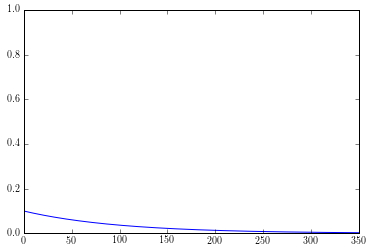

In [76]:
#p0, p1 = 1, 1
fx = lambda x,p0=1,p1=1: p0*exp(-(x/p1))  # p0/(x+p1)
X = linspace(0,350,350)
Y = [fx(x,.1,100) for x in X]
plot(X,Y)
ylim(0,1)

In [63]:
print(exp(0),exp(1))

(1.0, 2.7182818284590451)


In [66]:
fx(3)

7.3890560989306504

# General CC-cutoff efficiency

In [1]:
cc_eff_e1f = '''cc_nphe	1,1,27.4,0.717
cc_nphe	1,2,25.2,0.623
cc_nphe	1,3,30.6,0.546
cc_nphe	1,4,31.6,0.612
cc_nphe	1,5,25.2,0.741
cc_nphe	1,6,24.0,0.751
cc_nphe	1,7,29.9,0.804
cc_nphe	1,8,23.5,0.834
cc_nphe	1,9,30.3,0.912
cc_nphe	1,10,25.3,0.895
cc_nphe	1,11,25.0,0.963
cc_nphe	1,12,27.6,0.907
cc_nphe	1,13,27.4,0.988
cc_nphe	1,14,25.9,0.913
cc_nphe	1,15,26.5,0.985
cc_nphe	1,16,27.3,0.977
cc_nphe	1,17,25.8,0.983
cc_nphe	1,18,27.5,0.987
cc_nphe	1,19,37.2,0.996
cc_nphe	1,20,24.6,0.959
cc_nphe	1,21,24.7,0.976
cc_nphe	1,22,33.0,0.961
cc_nphe	1,23,27.8,0.986
cc_nphe	1,24,25.4,0.951
cc_nphe	1,25,24.1,0.985
cc_nphe	1,26,24.7,0.970
cc_nphe	1,27,23.2,0.995
cc_nphe	1,28,29.4,0.976
cc_nphe	1,29,34.8,0.975
cc_nphe	1,30,23.3,0.990
cc_nphe	1,31,23.3,0.982
cc_nphe	1,32,24.7,0.981
cc_nphe	1,33,23.1,0.971
cc_nphe	1,34,22.1,0.975
cc_nphe	1,35,25.1,0.983
cc_nphe	1,36,22.2,0.995
cc_nphe	2,1,26.6,0.438
cc_nphe	2,2,34.0,0.830
cc_nphe	2,3,27.5,0.748
cc_nphe	2,4,27.3,0.662
cc_nphe	2,5,28.8,0.700
cc_nphe	2,6,33.9,0.825
cc_nphe	2,7,19.2,0.832
cc_nphe	2,8,26.1,0.728
cc_nphe	2,9,25.5,0.871
cc_nphe	2,10,25.4,0.864
cc_nphe	2,11,18.0,0.882
cc_nphe	2,12,29.3,0.976
cc_nphe	2,13,25.5,0.811
cc_nphe	2,14,27.4,0.950
cc_nphe	2,15,19.4,0.928
cc_nphe	2,16,24.4,0.949
cc_nphe	2,17,22.5,0.952
cc_nphe	2,18,31.8,0.990
cc_nphe	2,19,25.8,0.940
cc_nphe	2,20,32.6,0.962
cc_nphe	2,21,24.1,0.909
cc_nphe	2,22,20.3,0.948
cc_nphe	2,23,21.9,0.949
cc_nphe	2,24,19.8,0.992
cc_nphe	2,25,25.6,0.965
cc_nphe	2,26,24.1,0.960
cc_nphe	2,27,24.8,0.977
cc_nphe	2,28,36.6,1.000
cc_nphe	2,29,21.7,0.987
cc_nphe	2,30,25.6,1.000
cc_nphe	2,31,27.2,0.969
cc_nphe	2,32,27.1,0.996
cc_nphe	2,33,24.3,0.985
cc_nphe	2,34,27.6,0.998
cc_nphe	2,35,29.5,1.000
cc_nphe	2,36,26.8,1.000
cc_nphe	3,1,27.0,0.741
cc_nphe	3,2,30.2,0.643
cc_nphe	3,3,30.4,0.819
cc_nphe	3,4,25.4,0.736
cc_nphe	3,5,23.9,0.774
cc_nphe	3,6,24.7,0.808
cc_nphe	3,7,27.6,0.819
cc_nphe	3,8,29.2,0.887
cc_nphe	3,9,28.4,0.953
cc_nphe	3,10,32.4,0.985
cc_nphe	3,11,25.4,0.978
cc_nphe	3,12,22.7,0.927
cc_nphe	3,13,24.6,0.880
cc_nphe	3,14,25.5,0.955
cc_nphe	3,15,27.3,0.947
cc_nphe	3,16,26.9,0.978
cc_nphe	3,17,29.0,0.993
cc_nphe	3,18,22.9,0.966
cc_nphe	3,19,29.3,0.953
cc_nphe	3,20,26.4,0.966
cc_nphe	3,21,26.3,0.976
cc_nphe	3,22,24.6,0.954
cc_nphe	3,23,27.8,0.982
cc_nphe	3,24,26.2,0.980
cc_nphe	3,25,28.9,0.973
cc_nphe	3,26,22.7,0.979
cc_nphe	3,27,29.5,0.988
cc_nphe	3,28,27.0,0.987
cc_nphe	3,29,28.8,0.999
cc_nphe	3,30,28.0,0.992
cc_nphe	3,31,33.1,0.999
cc_nphe	3,32,22.6,0.998
cc_nphe	3,33,24.8,0.999
cc_nphe	3,34,28.9,0.990
cc_nphe	3,35,29.0,1.0
cc_nphe	3,36,23.4,1.0
cc_nphe	4,1,24.5,0.537
cc_nphe	4,2,27.1,0.749
cc_nphe	4,3,20.5,0.485
cc_nphe	4,4,24.3,0.462
cc_nphe	4,5,30.4,0.811
cc_nphe	4,6,27.0,0.691
cc_nphe	4,7,20.2,0.773
cc_nphe	4,8,40.1,0.849
cc_nphe	4,9,24.4,0.816
cc_nphe	4,10,45.0,0.864
cc_nphe	4,11,21.3,0.718
cc_nphe	4,12,29.3,0.892
cc_nphe	4,13,28.0,0.889
cc_nphe	4,14,29.6,0.895
cc_nphe	4,15,28.4,0.921
cc_nphe	4,16,37.9,0.905
cc_nphe	4,17,23.9,0.938
cc_nphe	4,18,21.9,0.951
cc_nphe	4,19,24.3,0.904
cc_nphe	4,20,24.8,0.938
cc_nphe	4,21,28.5,0.836
cc_nphe	4,22,29.4,0.840
cc_nphe	4,23,27.5,0.942
cc_nphe	4,24,27.5,0.889
cc_nphe	4,25,19.6,0.940
cc_nphe	4,26,20.3,0.893
cc_nphe	4,27,20.9,0.927
cc_nphe	4,28,20.2,0.940
cc_nphe	4,29,27.7,0.984
cc_nphe	4,30,28.9,0.957
cc_nphe	4,31,31.2,0.968
cc_nphe	4,32,18.9,0.960
cc_nphe	4,33,25.0,0.968
cc_nphe	4,34,20.9,0.970
cc_nphe	4,35,25.3,1.000
cc_nphe	4,36,23.8,0.906
cc_nphe	5,1,31.1,0.182
cc_nphe	5,2,24.8,0.6
cc_nphe	5,3,25.4,0.793
cc_nphe	5,4,39.5,0.706
cc_nphe	5,5,32.4,0.875
cc_nphe	5,6,27.7,0.844
cc_nphe	5,7,34.6,0.797
cc_nphe	5,8,27.6,0.878
cc_nphe	5,9,24.7,0.981
cc_nphe	5,10,25.6,0.934
cc_nphe	5,11,30.8,0.972
cc_nphe	5,12,46.9,0.999
cc_nphe	5,13,26.4,0.948
cc_nphe	5,14,39.8,1.000
cc_nphe	5,15,19.2,0.963
cc_nphe	5,16,28.9,0.995
cc_nphe	5,17,19.7,0.934
cc_nphe	5,18,30.0,0.986
cc_nphe	5,19,19.9,0.978
cc_nphe	5,20,27.9,0.992
cc_nphe	5,21,33.0,0.986
cc_nphe	5,22,26.2,0.997
cc_nphe	5,23,26.1,0.984
cc_nphe	5,24,31.5,0.998
cc_nphe	5,25,48.6,1.000
cc_nphe	5,26,30.5,0.991
cc_nphe	5,27,16.0,0.977
cc_nphe	5,28,20.2,0.994
cc_nphe	5,29,27.3,0.999
cc_nphe	5,30,29.2,1.000
cc_nphe	5,31,39.6,0.999
cc_nphe	5,32,38.3,1.000
cc_nphe	5,33,28.7,0.992
cc_nphe	5,34,28.2,0.997
cc_nphe	5,35,22.1,1.000
cc_nphe	5,36,22.9,1.0
cc_nphe	6,1,33.8,0.5
cc_nphe	6,2,28.5,0.5
cc_nphe	6,3,34.8,0.598
cc_nphe	6,4,24.4,0.7
cc_nphe	6,5,31.1,0.800
cc_nphe	6,6,33.4,0.850
cc_nphe	6,7,26.9,0.862
cc_nphe	6,8,23.3,0.816
cc_nphe	6,9,23.9,0.878
cc_nphe	6,10,23.8,0.940
cc_nphe	6,11,30.4,0.912
cc_nphe	6,12,51.7,0.947
cc_nphe	6,13,26.6,0.974
cc_nphe	6,14,28.6,0.976
cc_nphe	6,15,26.1,0.984
cc_nphe	6,16,25.1,0.985
cc_nphe	6,17,21.5,0.983
cc_nphe	6,18,25.4,0.994
cc_nphe	6,19,38.4,0.995
cc_nphe	6,20,30.1,0.996
cc_nphe	6,21,23.2,0.966
cc_nphe	6,22,39.3,0.979
cc_nphe	6,23,28.7,0.997
cc_nphe	6,24,30.0,0.987
cc_nphe	6,25,25.8,0.998
cc_nphe	6,26,26.1,0.937
cc_nphe	6,27,21.3,0.979
cc_nphe	6,28,33.3,0.993
cc_nphe	6,29,28.7,1.000
cc_nphe	6,30,54.7,1.000
cc_nphe	6,31,30.8,0.999
cc_nphe	6,32,34.5,0.988
cc_nphe	6,33,27.3,0.990
cc_nphe	6,34,34.2,0.970
cc_nphe	6,35,25.1,1.000
cc_nphe	6,36,20.9,1.0'''

cc_eff_e16 = '''cc_nphe	1,1,28.6,0.572
cc_nphe	1,2,25.4,0.321
cc_nphe	1,3,28.9,0.548
cc_nphe	1,4,35.0,0.584
cc_nphe	1,5,25.2,0.730
cc_nphe	1,6,24.2,0.751
cc_nphe	1,7,29.1,0.806
cc_nphe	1,8,23.8,0.837
cc_nphe	1,9,31.5,0.917
cc_nphe	1,10,26.5,0.898
cc_nphe	1,11,26.4,0.950
cc_nphe	1,12,27.3,0.897
cc_nphe	1,13,27.6,0.991
cc_nphe	1,14,25.9,0.934
cc_nphe	1,15,27.9,0.987
cc_nphe	1,16,27.7,0.969
cc_nphe	1,17,25.8,0.983
cc_nphe	1,18,29.3,0.984
cc_nphe	1,19,40.3,0.996
cc_nphe	1,20,26.1,0.973
cc_nphe	1,21,25.0,0.984
cc_nphe	1,22,33.7,0.958
cc_nphe	1,23,29.6,0.987
cc_nphe	1,24,26.9,0.957
cc_nphe	1,25,25.3,0.994
cc_nphe	1,26,24.9,0.964
cc_nphe	1,27,24.3,0.993
cc_nphe	1,28,29.4,0.971
cc_nphe	1,29,35.1,0.976
cc_nphe	1,30,26.1,0.993
cc_nphe	1,31,23.8,0.972
cc_nphe	1,32,27.5,0.988
cc_nphe	1,33,24.4,0.955
cc_nphe	1,34,24.4,0.971
cc_nphe	1,35,25.6,1.000
cc_nphe	1,36,24.0,0.987
cc_nphe	2,1,29.4,0.230
cc_nphe	2,2,32.6,0.667
cc_nphe	2,3,29.9,0.767
cc_nphe	2,4,28.8,0.706
cc_nphe	2,5,36.0,0.750
cc_nphe	2,6,34.4,0.896
cc_nphe	2,7,21.6,0.634
cc_nphe	2,8,27.2,0.775
cc_nphe	2,9,27.4,0.780
cc_nphe	2,10,27.6,0.766
cc_nphe	2,11,20.5,0.940
cc_nphe	2,12,31.9,0.963
cc_nphe	2,13,30.6,0.925
cc_nphe	2,14,27.0,0.959
cc_nphe	2,15,21.4,0.959
cc_nphe	2,16,24.4,0.957
cc_nphe	2,17,24.7,0.926
cc_nphe	2,18,34.1,0.995
cc_nphe	2,19,30.6,0.961
cc_nphe	2,20,34.5,0.984
cc_nphe	2,21,25.0,0.930
cc_nphe	2,22,22.1,0.978
cc_nphe	2,23,25.1,0.983
cc_nphe	2,24,20.1,0.979
cc_nphe	2,25,27.4,0.977
cc_nphe	2,26,24.6,0.995
cc_nphe	2,27,26.7,0.987
cc_nphe	2,28,33.8,1.000
cc_nphe	2,29,23.8,0.976
cc_nphe	2,30,26.2,1.000
cc_nphe	2,31,28.7,0.971
cc_nphe	2,32,27.4,0.998
cc_nphe	2,33,24.7,0.986
cc_nphe	2,34,27.7,0.989
cc_nphe	2,35,31.0,0.971
cc_nphe	2,36,29.2,0.126
cc_nphe	3,1,30.0,0.000
cc_nphe	3,2,32.1,0.555
cc_nphe	3,3,31.6,0.778
cc_nphe	3,4,26.2,0.668
cc_nphe	3,5,25.0,0.764
cc_nphe	3,6,25.5,0.777
cc_nphe	3,7,28.1,0.852
cc_nphe	3,8,28.8,0.883
cc_nphe	3,9,29.5,0.943
cc_nphe	3,10,33.8,0.943
cc_nphe	3,11,25.5,0.969
cc_nphe	3,12,24.2,0.954
cc_nphe	3,13,28.0,0.944
cc_nphe	3,14,27.2,0.962
cc_nphe	3,15,30.9,0.964
cc_nphe	3,16,26.6,0.980
cc_nphe	3,17,32.0,0.990
cc_nphe	3,18,23.7,0.972
cc_nphe	3,19,30.0,0.986
cc_nphe	3,20,27.5,0.970
cc_nphe	3,21,28.0,0.992
cc_nphe	3,22,26.5,0.967
cc_nphe	3,23,28.5,0.994
cc_nphe	3,24,27.1,0.994
cc_nphe	3,25,28.4,0.980
cc_nphe	3,26,24.2,0.987
cc_nphe	3,27,30.1,0.998
cc_nphe	3,28,28.0,0.989
cc_nphe	3,29,30.3,0.999
cc_nphe	3,30,29.3,0.999
cc_nphe	3,31,35.5,0.999
cc_nphe	3,32,24.2,0.999
cc_nphe	3,33,25.2,0.998
cc_nphe	3,34,29.9,0.997
cc_nphe	3,35,28.4,0.331
cc_nphe	3,36,25.9,0.998
cc_nphe	4,1,26.6,0.000
cc_nphe	4,2,28.8,0.575
cc_nphe	4,3,20.9,0.474
cc_nphe	4,4,27.3,0.502
cc_nphe	4,5,30.8,0.831
cc_nphe	4,6,27.3,0.724
cc_nphe	4,7,20.3,0.818
cc_nphe	4,8,42.6,0.905
cc_nphe	4,9,25.0,0.855
cc_nphe	4,10,47.1,0.912
cc_nphe	4,11,22.5,0.739
cc_nphe	4,12,29.7,0.913
cc_nphe	4,13,31.8,0.971
cc_nphe	4,14,29.5,0.939
cc_nphe	4,15,29.2,0.968
cc_nphe	4,16,33.2,0.960
cc_nphe	4,17,25.7,0.953
cc_nphe	4,18,22.6,0.980
cc_nphe	4,19,26.1,0.927
cc_nphe	4,20,25.2,0.926
cc_nphe	4,21,31.7,0.885
cc_nphe	4,22,31.8,0.864
cc_nphe	4,23,28.9,0.958
cc_nphe	4,24,29.3,0.912
cc_nphe	4,25,20.8,0.945
cc_nphe	4,26,21.1,0.946
cc_nphe	4,27,22.5,0.967
cc_nphe	4,28,21.7,0.971
cc_nphe	4,29,29.8,0.986
cc_nphe	4,30,29.9,0.965
cc_nphe	4,31,33.6,0.971
cc_nphe	4,32,19.6,0.965
cc_nphe	4,33,27.2,0.981
cc_nphe	4,34,20.5,0.961
cc_nphe	4,35,27.1,0.998
cc_nphe	4,36,23.9,1.000
cc_nphe	5,1,31.3,0.512
cc_nphe	5,2,27.1,0.000
cc_nphe	5,3,26.7,0.616
cc_nphe	5,4,39.5,0.587
cc_nphe	5,5,32.2,0.888
cc_nphe	5,6,28.1,0.822
cc_nphe	5,7,36.8,0.917
cc_nphe	5,8,28.2,0.912
cc_nphe	5,9,26.0,0.988
cc_nphe	5,10,28.7,0.932
cc_nphe	5,11,32.9,0.977
cc_nphe	5,12,41.1,1.000
cc_nphe	5,13,29.0,0.968
cc_nphe	5,14,41.0,0.989
cc_nphe	5,15,19.0,0.968
cc_nphe	5,16,27.9,0.994
cc_nphe	5,17,19.2,0.944
cc_nphe	5,18,31.4,0.985
cc_nphe	5,19,21.8,0.987
cc_nphe	5,20,28.6,0.992
cc_nphe	5,21,35.9,0.980
cc_nphe	5,22,27.8,0.996
cc_nphe	5,23,29.3,0.999
cc_nphe	5,24,33.8,0.998
cc_nphe	5,25,51.0,1.000
cc_nphe	5,26,32.4,0.998
cc_nphe	5,27,20.6,0.993
cc_nphe	5,28,20.9,0.995
cc_nphe	5,29,29.5,0.999
cc_nphe	5,30,32.2,0.999
cc_nphe	5,31,42.7,0.999
cc_nphe	5,32,40.2,1.000
cc_nphe	5,33,30.6,0.967
cc_nphe	5,34,29.4,0.994
cc_nphe	5,35,23.9,0.999
cc_nphe	5,36,22.9,0.938
cc_nphe	6,1,30.4,0.218
cc_nphe	6,2,31.0,0.607
cc_nphe	6,3,36.2,0.814
cc_nphe	6,4,26.5,0.780
cc_nphe	6,5,32.4,0.836
cc_nphe	6,6,32.8,0.869
cc_nphe	6,7,28.5,0.900
cc_nphe	6,8,23.7,0.817
cc_nphe	6,9,24.8,0.871
cc_nphe	6,10,23.9,0.893
cc_nphe	6,11,34.1,0.805
cc_nphe	6,12,40.0,0.978
cc_nphe	6,13,28.7,0.986
cc_nphe	6,14,28.9,0.984
cc_nphe	6,15,28.6,0.991
cc_nphe	6,16,23.2,0.985
cc_nphe	6,17,20.6,0.987
cc_nphe	6,18,22.8,0.992
cc_nphe	6,19,40.8,0.988
cc_nphe	6,20,31.5,0.997
cc_nphe	6,21,24.6,0.974
cc_nphe	6,22,46.0,0.998
cc_nphe	6,23,30.4,0.997
cc_nphe	6,24,32.1,0.978
cc_nphe	6,25,24.4,0.997
cc_nphe	6,26,28.4,0.967
cc_nphe	6,27,23.0,0.991
cc_nphe	6,28,37.4,0.999
cc_nphe	6,29,30.3,1.000
cc_nphe	6,30,57.5,1.000
cc_nphe	6,31,33.1,0.999
cc_nphe	6,32,37.2,0.995
cc_nphe	6,33,28.2,0.982
cc_nphe	6,34,37.6,0.988
cc_nphe	6,35,25.8,0.998
cc_nphe	6,36,23.0,0.998'''

In [22]:
cc_eff_e16_data = [(int(sect), int(pmt), float(eff)) for (sect, pmt, fcut, eff) in [line.split('\t')[1].split(',') for line in cc_eff_e16.split('\n')]]
cc_eff_e1f_data = [(int(sect), int(pmt), float(eff)) for (sect, pmt, fcut, eff) in [line.split('\t')[1].split(',') for line in cc_eff_e1f.split('\n')]]

In [23]:
parmsout_e16 = [[]]*6
for rec in cc_eff_e16_data:
    parmsout_e16[rec[0]-1].append(rec[2])
    
parmsout_e1f = [[]]*6
for rec in cc_eff_e1f_data:
    parmsout_e1f[rec[0]-1].append(rec[2])

In [24]:
for isect in range(0,6):
    print('cc_nphe\t%d,'%(isect+1)+','.join([str(eff) for eff in parmsout_e16[isect]]))

cc_nphe	1,0.572,0.321,0.548,0.584,0.73,0.751,0.806,0.837,0.917,0.898,0.95,0.897,0.991,0.934,0.987,0.969,0.983,0.984,0.996,0.973,0.984,0.958,0.987,0.957,0.994,0.964,0.993,0.971,0.976,0.993,0.972,0.988,0.955,0.971,1.0,0.987,0.23,0.667,0.767,0.706,0.75,0.896,0.634,0.775,0.78,0.766,0.94,0.963,0.925,0.959,0.959,0.957,0.926,0.995,0.961,0.984,0.93,0.978,0.983,0.979,0.977,0.995,0.987,1.0,0.976,1.0,0.971,0.998,0.986,0.989,0.971,0.126,0.0,0.555,0.778,0.668,0.764,0.777,0.852,0.883,0.943,0.943,0.969,0.954,0.944,0.962,0.964,0.98,0.99,0.972,0.986,0.97,0.992,0.967,0.994,0.994,0.98,0.987,0.998,0.989,0.999,0.999,0.999,0.999,0.998,0.997,0.331,0.998,0.0,0.575,0.474,0.502,0.831,0.724,0.818,0.905,0.855,0.912,0.739,0.913,0.971,0.939,0.968,0.96,0.953,0.98,0.927,0.926,0.885,0.864,0.958,0.912,0.945,0.946,0.967,0.971,0.986,0.965,0.971,0.965,0.981,0.961,0.998,1.0,0.512,0.0,0.616,0.587,0.888,0.822,0.917,0.912,0.988,0.932,0.977,1.0,0.968,0.989,0.968,0.994,0.944,0.985,0.987,0.992,0.98,0.996,0.999,0.998,1.0,0.998,0.

In [25]:
for isect in range(0,6):
    print('cc_nphe\t%d,'%(isect+1)+','.join([str(eff) for eff in parmsout_e1f[isect]]))

cc_nphe	1,0.717,0.623,0.546,0.612,0.741,0.751,0.804,0.834,0.912,0.895,0.963,0.907,0.988,0.913,0.985,0.977,0.983,0.987,0.996,0.959,0.976,0.961,0.986,0.951,0.985,0.97,0.995,0.976,0.975,0.99,0.982,0.981,0.971,0.975,0.983,0.995,0.438,0.83,0.748,0.662,0.7,0.825,0.832,0.728,0.871,0.864,0.882,0.976,0.811,0.95,0.928,0.949,0.952,0.99,0.94,0.962,0.909,0.948,0.949,0.992,0.965,0.96,0.977,1.0,0.987,1.0,0.969,0.996,0.985,0.998,1.0,1.0,0.741,0.643,0.819,0.736,0.774,0.808,0.819,0.887,0.953,0.985,0.978,0.927,0.88,0.955,0.947,0.978,0.993,0.966,0.953,0.966,0.976,0.954,0.982,0.98,0.973,0.979,0.988,0.987,0.999,0.992,0.999,0.998,0.999,0.99,1.0,1.0,0.537,0.749,0.485,0.462,0.811,0.691,0.773,0.849,0.816,0.864,0.718,0.892,0.889,0.895,0.921,0.905,0.938,0.951,0.904,0.938,0.836,0.84,0.942,0.889,0.94,0.893,0.927,0.94,0.984,0.957,0.968,0.96,0.968,0.97,1.0,0.906,0.182,0.6,0.793,0.706,0.875,0.844,0.797,0.878,0.981,0.934,0.972,0.999,0.948,1.0,0.963,0.995,0.934,0.986,0.978,0.992,0.986,0.997,0.984,0.998,1.0,0.991,0.977,0

In [95]:
%matplotlib inline
import pandas as pd

In [96]:
df_cc_eff_e16_data = pd.DataFrame(cc_eff_e16_data, columns=['sector', 'pmt', 'eff'])

In [97]:
ch2n = [(int(sect),int(pmt),float(chi2n)) for (sect, hpar) in enumerate(hpars,1) \
                         for (pmt,chi2n) in zip(hpar[0].x(),hpar[0].y())]

In [98]:
df_cc_eff_e16_data = \
df_cc_eff_e16_data.merge(pd.DataFrame(ch2n, columns=['sector','pmt','chi2n']),
                         left_on=['sector','pmt'], right_on=['sector','pmt'])

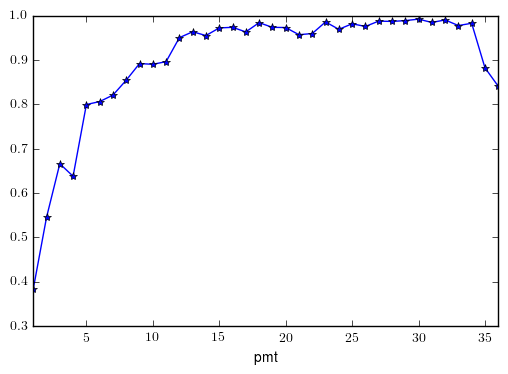

In [99]:
df_cc_eff_e16_data[df_cc_eff_e16_data.chi2n<5].groupby('pmt').eff.mean().plot(marker='*')

In [100]:
X = df_cc_eff_e1f_data.groupby('pmt').eff.mean().index.values
Y = df_cc_eff_e1f_data.groupby('pmt').eff.mean().values

In [101]:
df_cc_eff_e1f_data.groupby('pmt').eff.mean().index.values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36])

In [102]:
import matplotlib as mpl
from matplotlib import pyplot as plt

In [37]:
import numpy as np

In [9]:
np.polyfit(X[:-4], Y[:-4], 2)

array([ -4.41304949e-04,   2.06100758e-02,   7.42497144e-01])

In [10]:
import ROOT as R

In [11]:
f = R.TF1('f', '1-[0]*exp(-x/[1])', 0, 36)

In [12]:
from array import array

In [13]:
g = R.TGraph(len(X), array('f', X), array('f', Y))

In [20]:
g.Draw('*')

In [24]:
g.Fit(f, '', '', 0, 31)

In [22]:
f.Draw('same')

In [35]:
print(f.GetParameter(0), f.GetParameter(1))

0.0 0.0


In [23]:
f.SetParameter(0, 1)
f.SetParameter(1, 1)

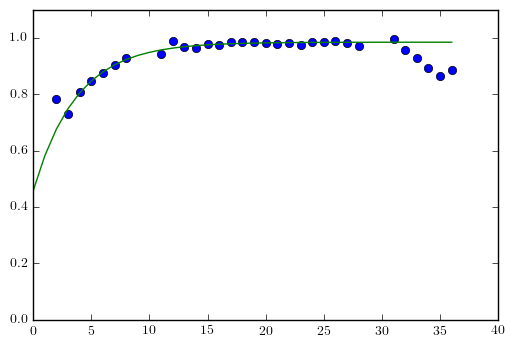

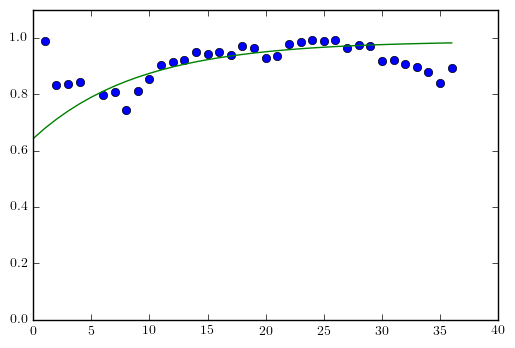

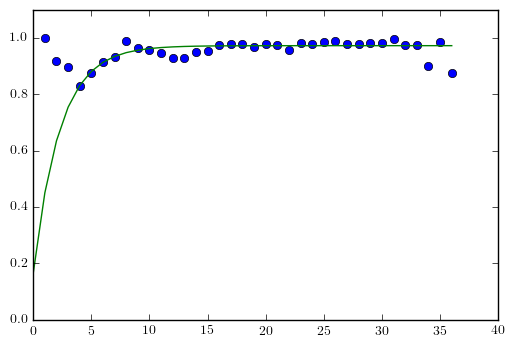

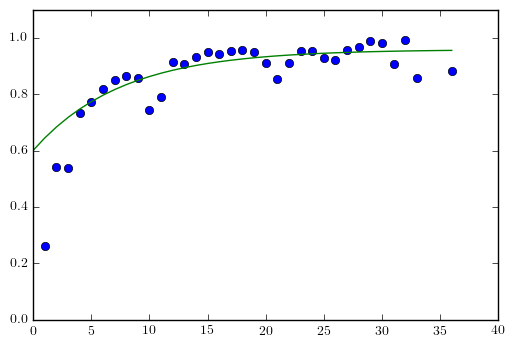

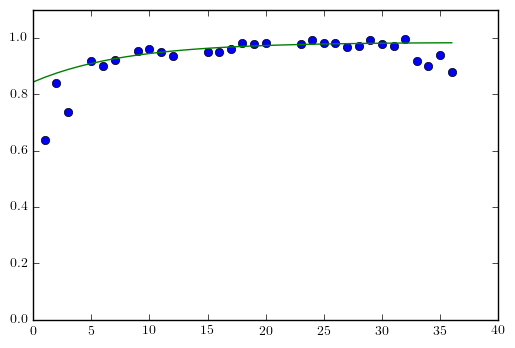

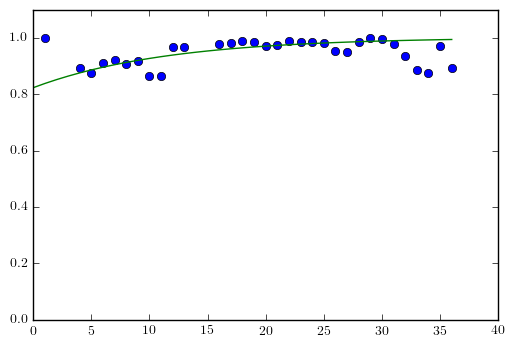

In [103]:
from array import array
f = R.TF1('f', '[2]-[0]*exp(-x/[1])', 0, 36)
# f.SetParLimits(0, 0.98, 1)
f.SetParameter(0, 1)
f.SetParameter(1, 1)
f.SetParameter(2, 1)
# f.SetParLimits()
for name, group in df_cc_eff_e1f_data[df_cc_eff_e1f_data.chi2n<5].groupby('sector'):
    X, Y = group.pmt, group.eff
    g = R.TGraph(len(X), array('f', X.values), array('f', Y.values))
    g.Fit(f, '', '', 4, 31)
    Xf = range(0, 37)
    Yf = [f.Eval(x) for x in Xf]
    plt.plot(X, Y, 'o', Xf, Yf, '-')
    plt.ylim(0,1.1)
    plt.show()


0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
186    6
187    6
188    6
189    6
190    6
191    6
192    6
193    6
194    6
195    6
196    6
197    6
198    6
199    6
200    6
201    6
202    6
203    6
204    6
205    6
206    6
207    6
208    6
209    6
210    6
211    6
212    6
213    6
214    6
215    6
Name: sector, dtype: int64